In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
#Loading data
data = pd.read_csv("loan.csv", low_memory = False) 
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## data shape 

In [8]:
data.shape # there are 39717 rows and 111 columns

(39717, 111)

In [9]:
#finding percentage of all null and misssing values
null_percentage = round(100*(data.isnull().sum()/len(data.index)), 2)

In [10]:
null_percentage[null_percentage>0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

## Data cleansing - removing null columns which values are greater than 30 % 

In [11]:
data.drop(null_percentage[null_percentage>30]. index, axis=1, inplace=True)

In [12]:
#Finding number of unique values in each vcolumn
data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

#### Out of the above displayed columns from tax_liens to pymnt_plan, these columns have one unique value in all the rows, this data is not useful so removing them

In [13]:
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [14]:
# finding no.of unique_values in columns and printing them in high to low
data.nunique().sort_values(ascending=False).head(15)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
recoveries          4040
dtype: int64

#### Columns id, url, member_id have all unique values, so one of these columns can be used as key. Let's consider column 'id' as primary key and remove the remaining. Similarly columns 'emp_title' and 'title' have text values where we cannot compute to let's remove them also.

In [15]:
data.drop(['member_id', 'url', 'emp_title', 'title'], axis=1, inplace=True)

#### Removing unwanted columns like total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fees, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv,  because these columns have info of loans that are already been issues and charged off loans

In [16]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [17]:
#finding null percentage in cleaned dataframe
null_percentage = round(100*(data.isnull().sum()/len(data.index)), 2)
null_percentage[null_percentage>0]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

#### Removing null values on the above columns and finding null value percentage

In [19]:
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
null_percentage=round(100*(data.isnull().sum()/len(data.index)), 2)
null_percentage[null_percentage>0]

Series([], dtype: float64)

#### Column loan_status has 3 values current, Fully paid and charged off, current is a running loan 

In [20]:
data = data[data.loan_status != 'Current']

In [21]:
#checking unique values in term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [22]:
data.shape

(36800, 31)

In [23]:
# Verifying datatypes of all existing columns
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

#### Columns int_rate & revol_util have percentage values of dtype objects, so converting these column values to float

In [24]:
data['int_rate'] = data['int_rate'].astype(str)
data['int_rate'] = data['int_rate'].str.replace('%','').astype(float)


C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\242637240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['int_rate'] = data['int_rate'].astype(str)
C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\242637240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['int_rate'] = data['int_rate'].str.replace('%','').astype(float)


In [25]:
data['revol_util'] = data['revol_util'].astype(str)
data['revol_util'] = data['revol_util'].str.replace('%','').astype(float)

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\1090942027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['revol_util'] = data['revol_util'].astype(str)
C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\1090942027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['revol_util'] = data['revol_util'].str.replace('%','').astype(float)


#### Columns issue_d and earliest_cr_line are date fields, but the dtype are objects, so we convert them to dtype 'datetime'

In [26]:
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#subtracting values more than 2023  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2023 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2023 else x)

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\267808627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\267808627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2023 else x)
C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\267808627.py:5: SettingWithCopyWarning: 
A value is trying to be se

In [27]:
#checking converted data types
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

In [28]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   
2  1077175       2400         2400           2400.0   36 months     15.96   
3  1076863      10000        10000          10000.0   36 months     13.49   
5  1075269       5000         5000           5000.0   36 months      7.90   

   installment grade sub_grade emp_length  ... inq_last_6mths  open_acc  \
0       162.87     B        B2  10+ years  ...              1         3   
1        59.83     C        C4   < 1 year  ...              5         3   
2        84.33     C        C5  10+ years  ...              2         2   
3       339.31     C        C1  10+ years  ...              1        10   
5       156.46     A        A4    3 years  ...              3         9   

  pub_rec revol_bal revol_util total_acc   total_pymnt total_pymnt_inv  \
0       0     13648       83.7         9   5863.155187         5833.84   
1       0      1687        9.4         4   1008.710000         1008.71   
2       0      2956       98.5        10   3005.666844         3005.67   
3       0      5598       21.0        37  12231.890000        12231.89   
5       0      7963       28.3        12   5632.210000         5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies  
0           171.62                   0.0  
1           119.66                   0.0  
2           649.91                   0.0  
3           357.48                   0.0  
5           161.03                   0.0  

[5 rows x 31 columns]

#### Analysis using derived variables and creating new columns for datetime columns

In [29]:
# issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\116937513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_d_year'] = data.issue_d.dt.year
C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\116937513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_d_month'] = data.issue_d.dt.strftime('%b')
C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\116937513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [30]:
#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\3767451333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\3767451333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\3767451333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

#### Creatinf Approved Loan amount ratio of funded amount by investors

In [31]:
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt, 2)

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\2849851827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt, 2)


In [32]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   
2  1077175       2400         2400           2400.0   36 months     15.96   
3  1076863      10000        10000          10000.0   36 months     13.49   
5  1075269       5000         5000           5000.0   36 months      7.90   

   installment grade sub_grade emp_length  ...   total_pymnt  total_pymnt_inv  \
0       162.87     B        B2  10+ years  ...   5863.155187          5833.84   
1        59.83     C        C4   < 1 year  ...   1008.710000          1008.71   
2        84.33     C        C5  10+ years  ...   3005.666844          3005.67   
3       339.31     C        C1  10+ years  ...  12231.890000         12231.89   
5       156.46     A        A4    3 years  ...   5632.210000          5632.21   

  last_pymnt_amnt pub_rec_bankruptcies issue_d_year issue_d_month  \
0          171.62                  0.0         2011           Dec   
1          119.66                  0.0         2011           Dec   
2          649.91                  0.0         2011           Dec   
3          357.48                  0.0         2011           Dec   
5          161.03                  0.0         2011           Dec   

  issue_d_weekday earliest_cr_line_year  earliest_cr_line_month  \
0               3                  1985                     Jan   
1               3                  1999                     Apr   
2               3                  2001                     Nov   
3               3                  1996                     Feb   
5               3                  2004                     Nov   

   approved_loan_amnt_ratio  
0                      99.5  
1                     100.0  
2                     100.0  
3                     100.0  
5                     100.0  

[5 rows x 37 columns]

In [33]:
data.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec    

### Univariate Analysis - Loan Amount

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\2767124943.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.loan_amnt, rug=True)


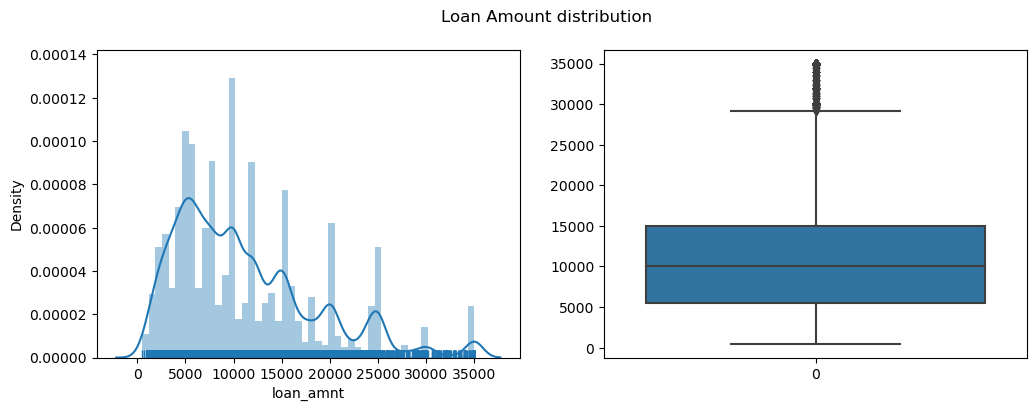

In [34]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

#### Calculating percentile ranges for futher calculate IQR 

In [35]:
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      22000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Observations on loan_amnt: From the above analysis and charts, The Loan amount range from 500 - 35000 , most no.of loans issued are around the amount 10000

## funded_amnt column

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\593775423.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.funded_amnt, rug=True)


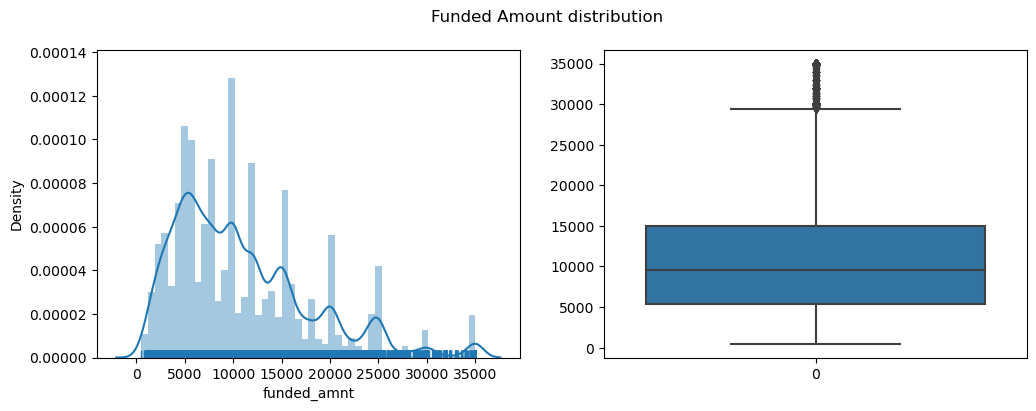

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [37]:
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36800.000000
mean     10880.794837
std       7109.157574
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
90%      20375.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

####  Observations on fund_amnt: From the above analysis and charts, We can deem the ratio of funded_amnt & loan_amnt are proportional and Lending club app approved most of loans applied

## funded_amnt_inv column

#### We plot total amount committed by investors for a loan in time data

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\3953301746.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.funded_amnt_inv, rug=True)


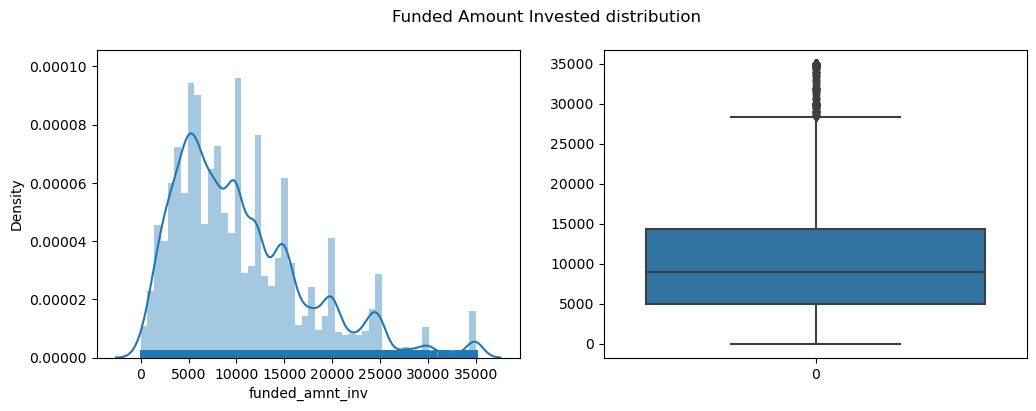

In [38]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [39]:
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36800.000000
mean     10439.055845
std       7008.522880
min          0.000000
5%        2000.000000
10%       3000.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
90%      20000.000000
95%      24655.816803
99%      34725.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

#### As per the above three plots, these three categories are correlated to each other.

## Approved Loan Amount Ratio

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\1519183886.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.approved_loan_amnt_ratio)


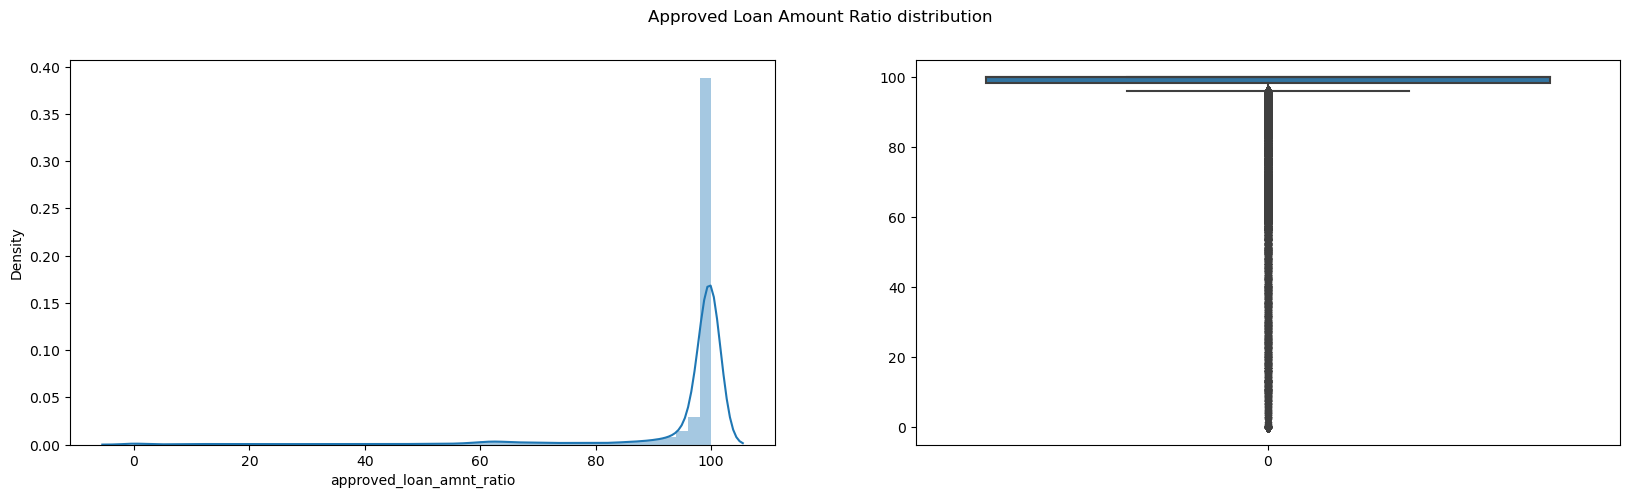

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

#### Observations: approx 85% of Borrowers got 100% loan amount from investors

## Interest Rate

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\2321668034.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.int_rate, rug=True)


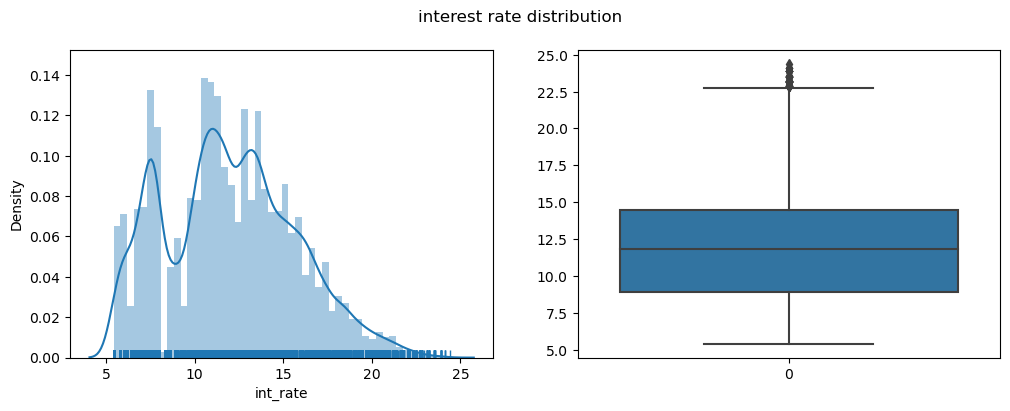

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

#### From the above observation we can conclude that most of the intrest rate range between 9-14.5%, where some loans are issued at higher 22.5%, this can be a outlier.

## Installment

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\336919139.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=installment, rug=True)


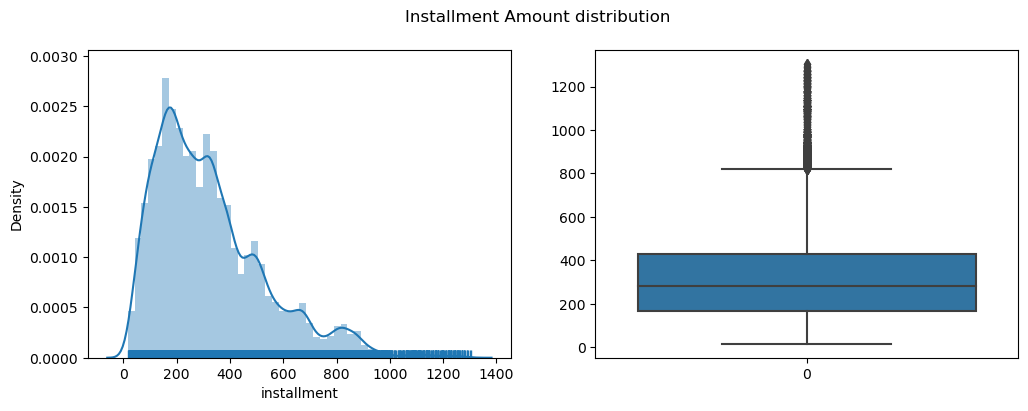

In [42]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

## Annual_inc

#### Borrower has self-declared annual income

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\1910509172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=var1, rug=True)


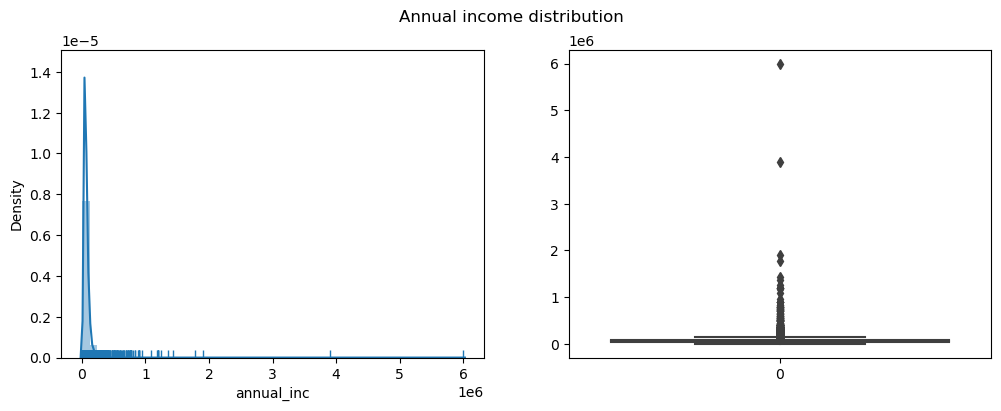

In [43]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

#### Observation: Around 361 people income range is more than 235000 and around 98% percent of borrowers has incomes below 235000.

## dti

#### A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\4115359295.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=var1, rug=True)


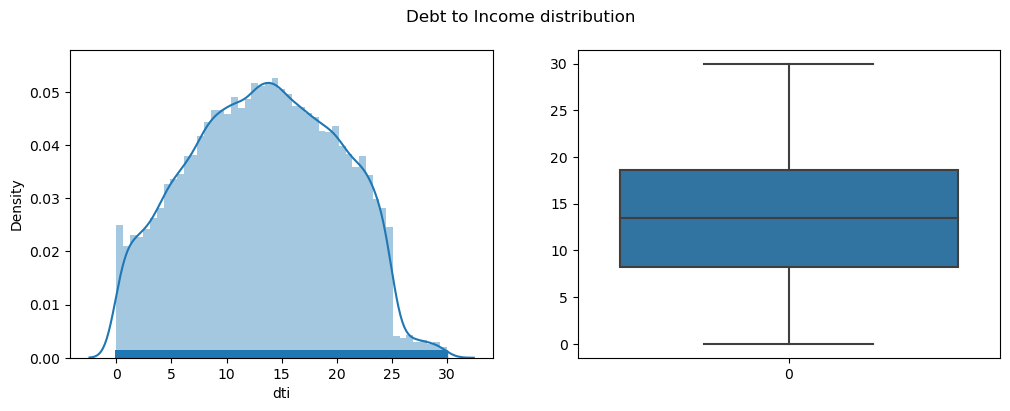

In [44]:
var1 = data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

#### Observation: From the above distribution it looks like a normal distribution and most of the borrower's dti is less than 30

## pub_rec_bankruptcies

#### No.of public record bankruptcies

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

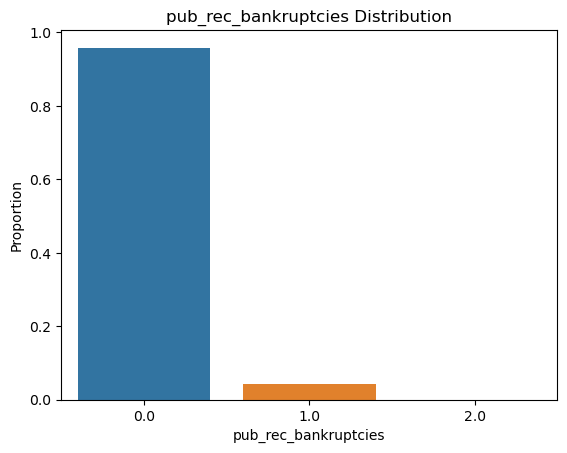

In [45]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

#### Observation: Only 1% of people have filed for bankruptcy

## issue_d (Loan issue date)

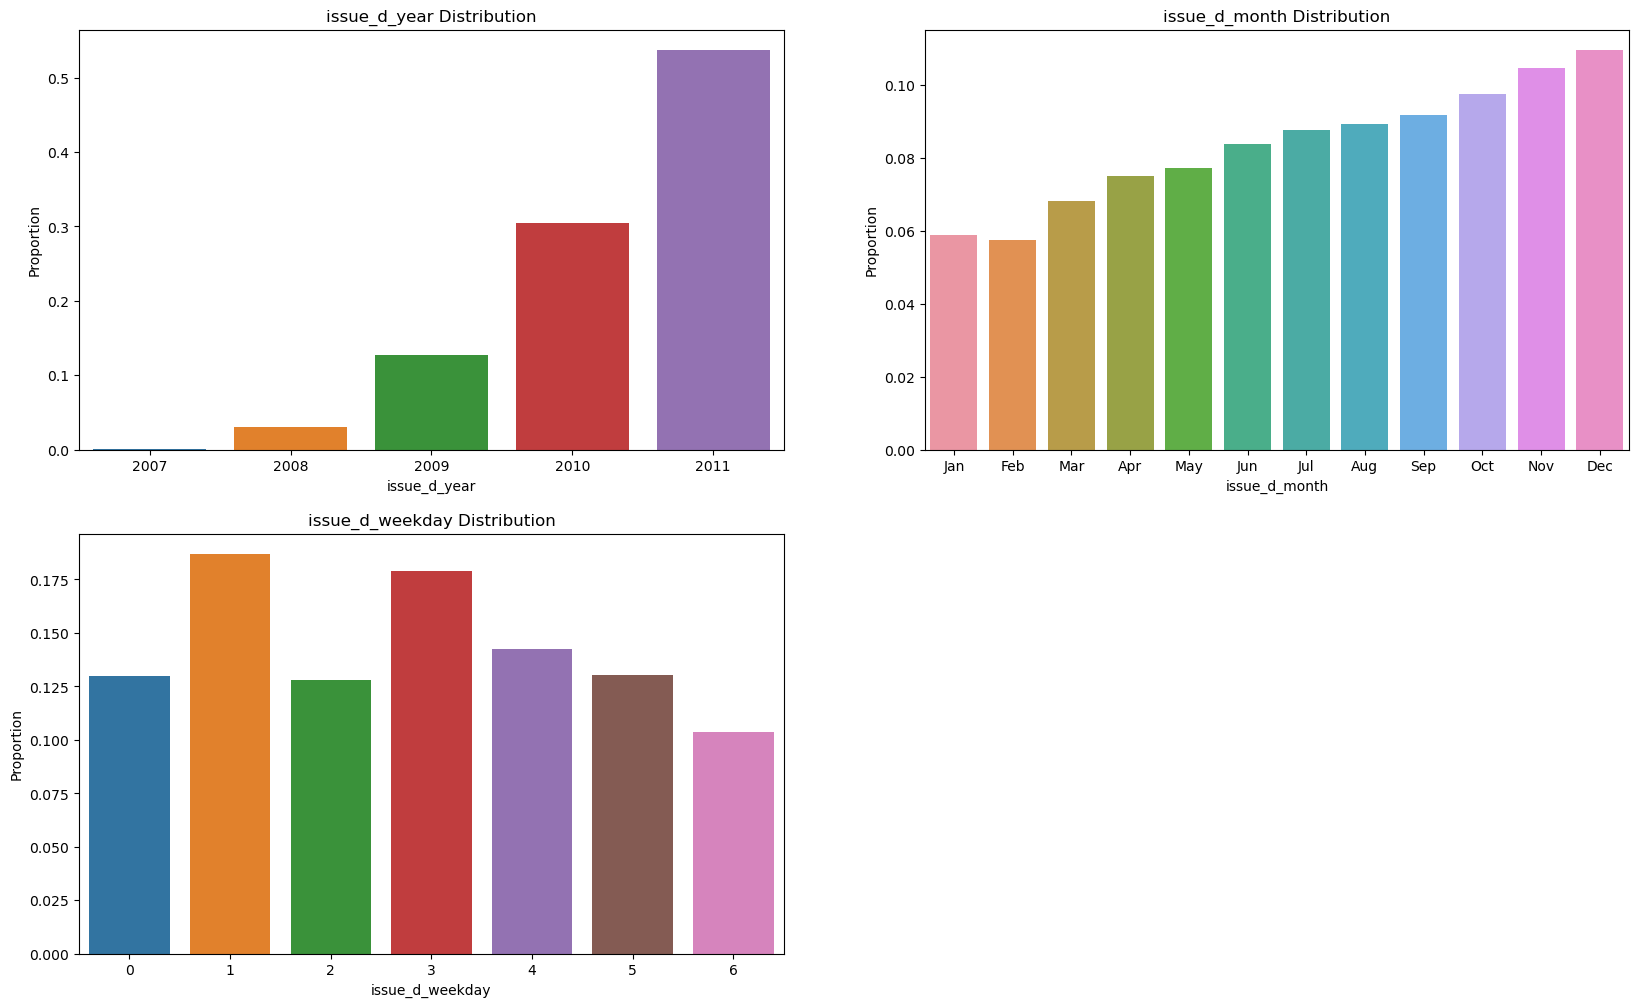

In [48]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
prob_df = data[var].value_counts(normalize=True).reindex(month_order).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

#### Observation: Lending club has doubled its loan issue amount every year
####                        Oct, Nov, Dec are the peak months for issuing loans and has peak business
                    

## Term

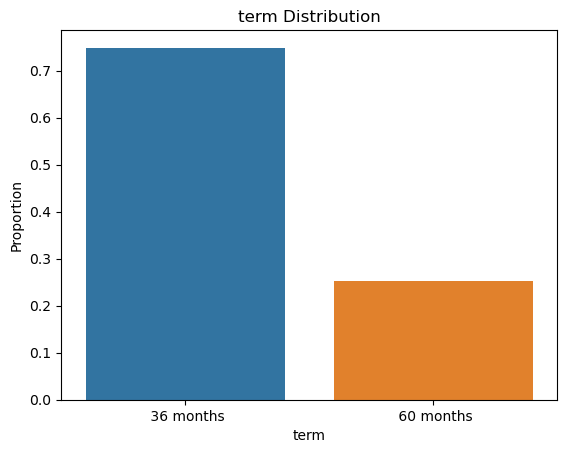

In [49]:
var = 'term'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations: Most of the loans are issued for 36 months, which means borrowers are intrested for short period of loans

## Grade

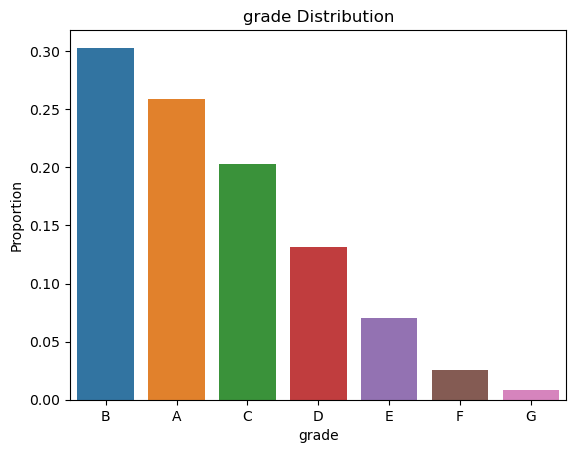

In [50]:
var = 'grade'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Top 3 grades are 'B', 'A' & 'C'

## Employment length

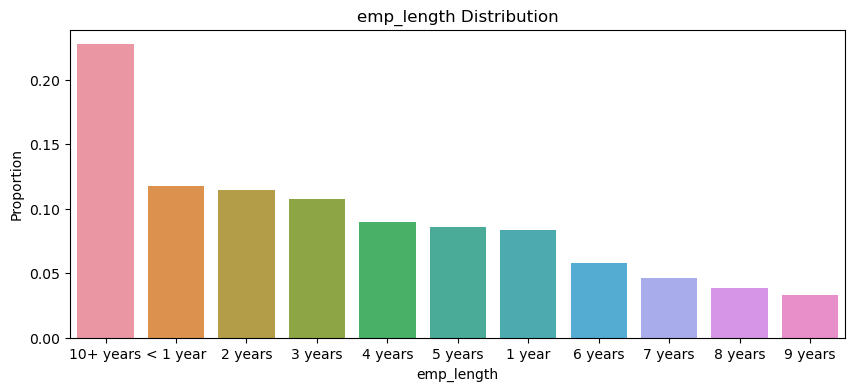

In [51]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observation: Highest no.of borrowers have more than 10 years of experience

## Home Ownership

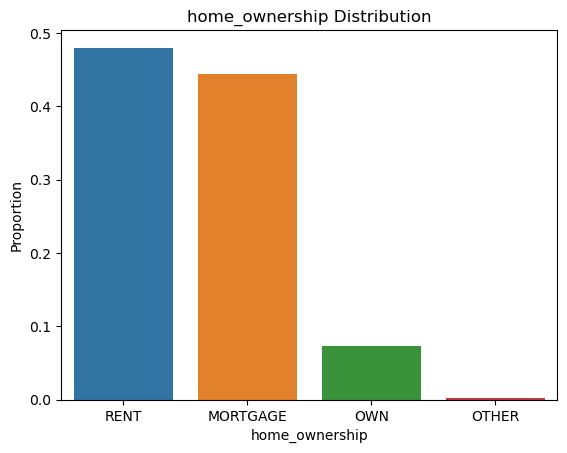

In [52]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observation: Majority of the borrowers lives in Rented & Mortgage houses

## Verification Status

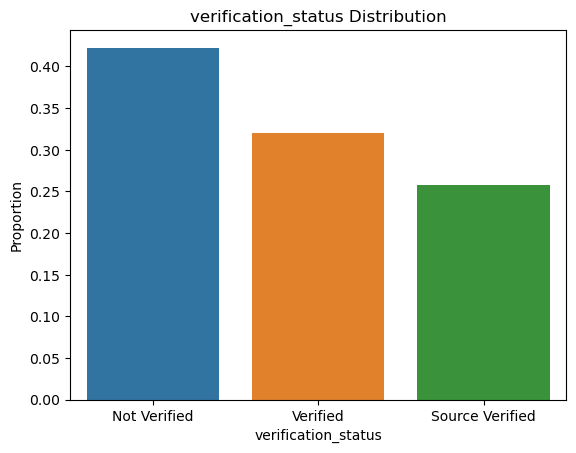

In [53]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations: Many Borrowers due digilence is not done for issuing loans

## Loan Status

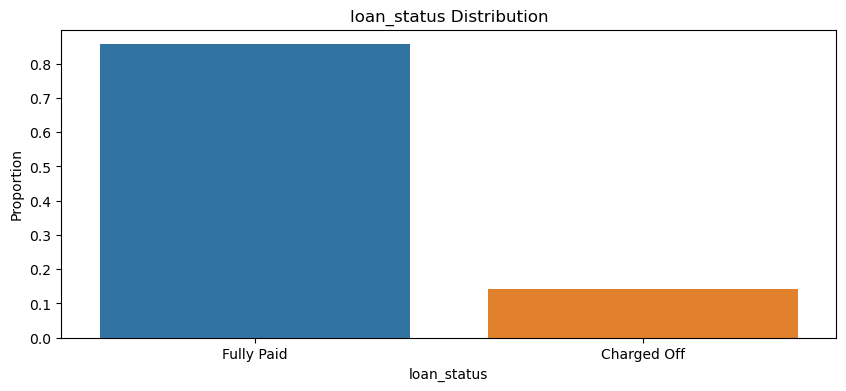

In [54]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations: Approx 85% of the loans are Fully paid and areound 15% are defaulted

## add_state (State of Borrower)

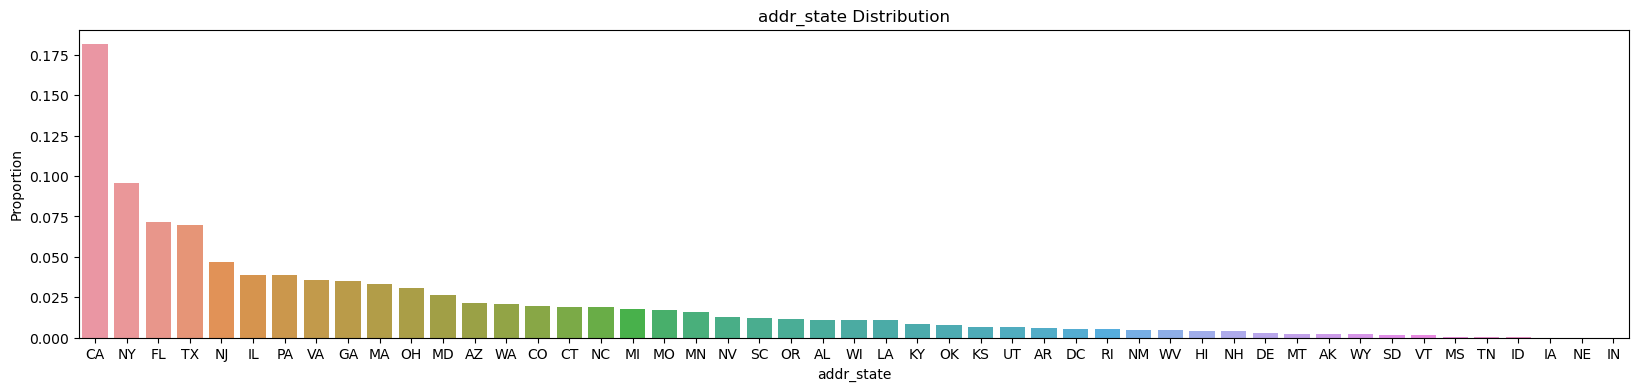

In [55]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

#### Observations: CA and NY has the most no.of borrowers

# Segmented Univariate Analysis

## Loan Amount

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

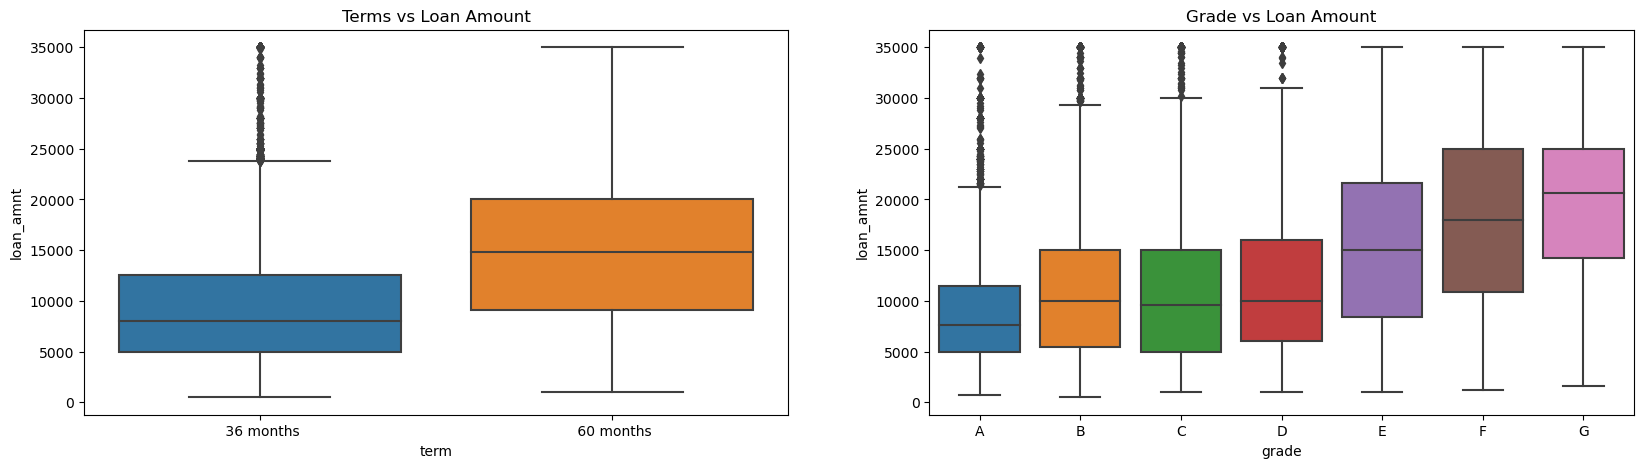

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

#### Observations: Higher amount loans have higher tenure which is 60 months

## Home ownership

<Axes: title={'center': 'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

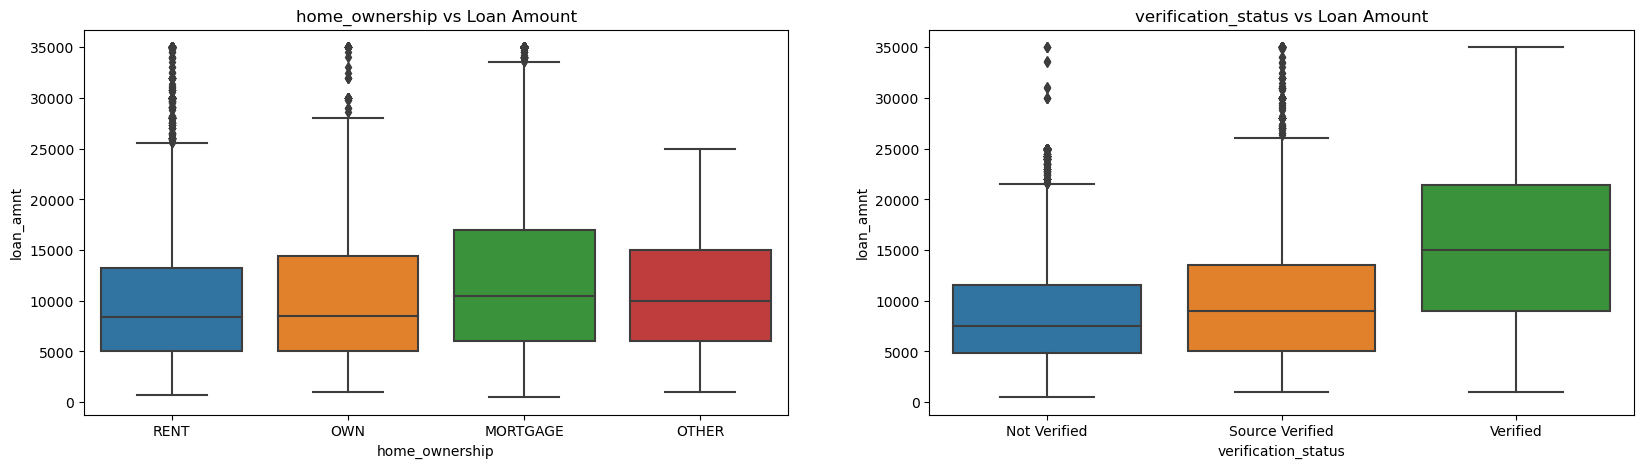

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

#### Observations: Mortgage Borrowers are higher on the IQR range and median level and most of the borrower's who has taken loan more than 9000 are verified (KYC is done) 

## Loan defaults

Text(0.5, 1.0, 'loan_status vs Loan Amount')

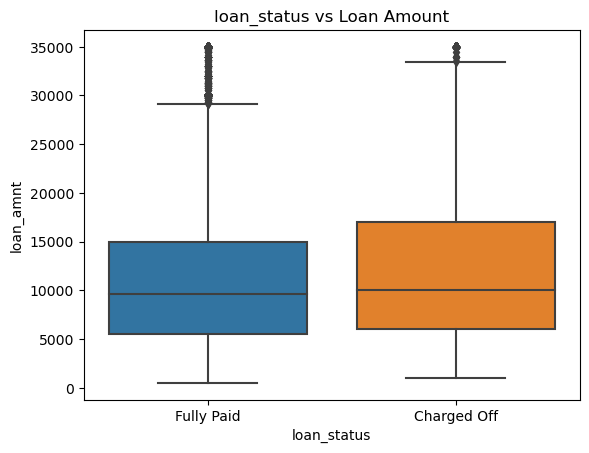

In [58]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

#### Observations: Charged off amounts have higher amounts than Fully paid loans.

## Purpose

Text(0.5, 1.0, 'purpose vs Loan Amount')

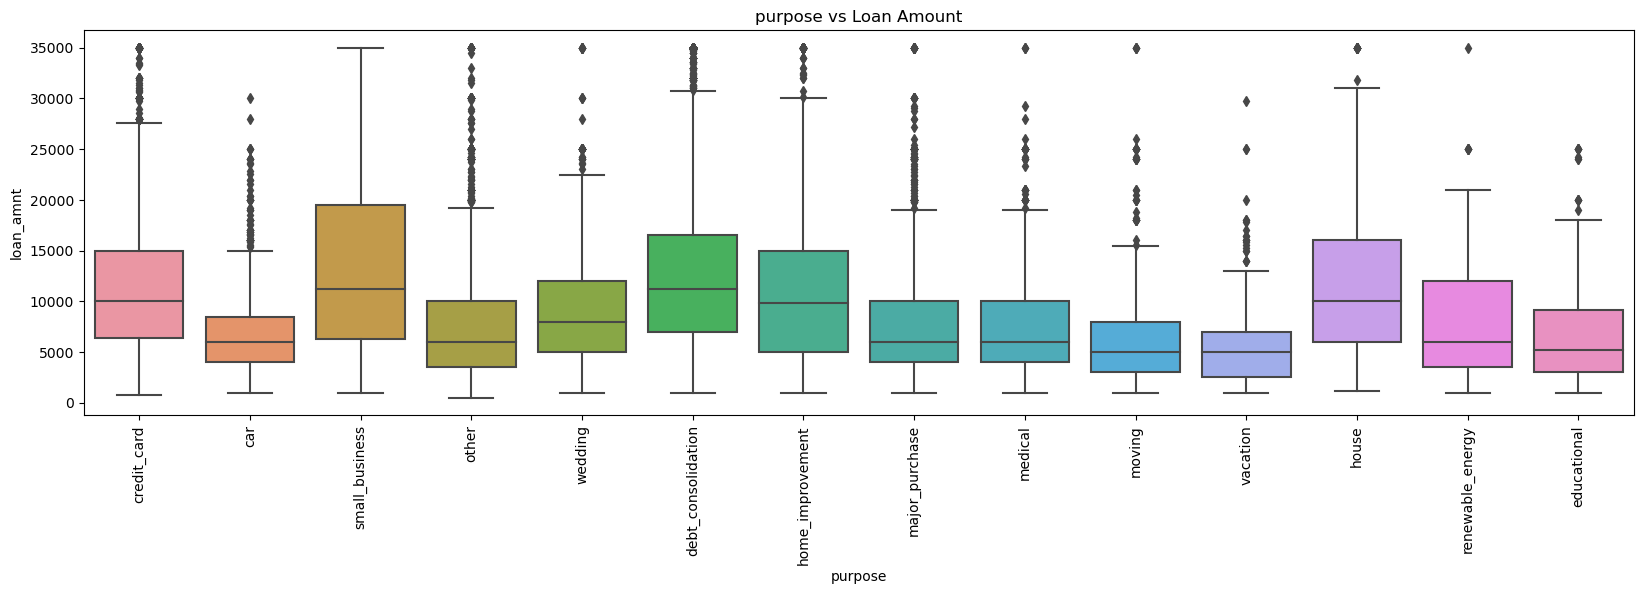

In [59]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

#### Observations: Small business and Debt consolidation are the top purpose loans are issued 

## emp_length and loan_amnt

Text(0.5, 1.0, 'emp_length vs Loan Amount')

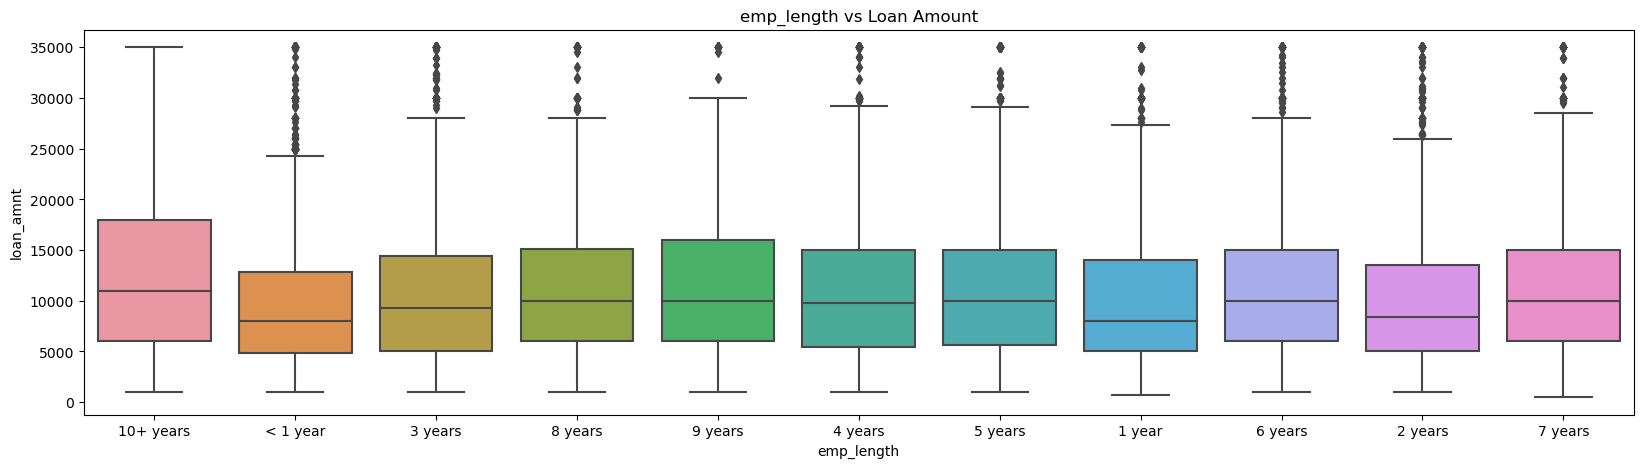

In [60]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

#### Observations: Borrower's work experience max is more than 10 years and min is less than an year

## int_rate

<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

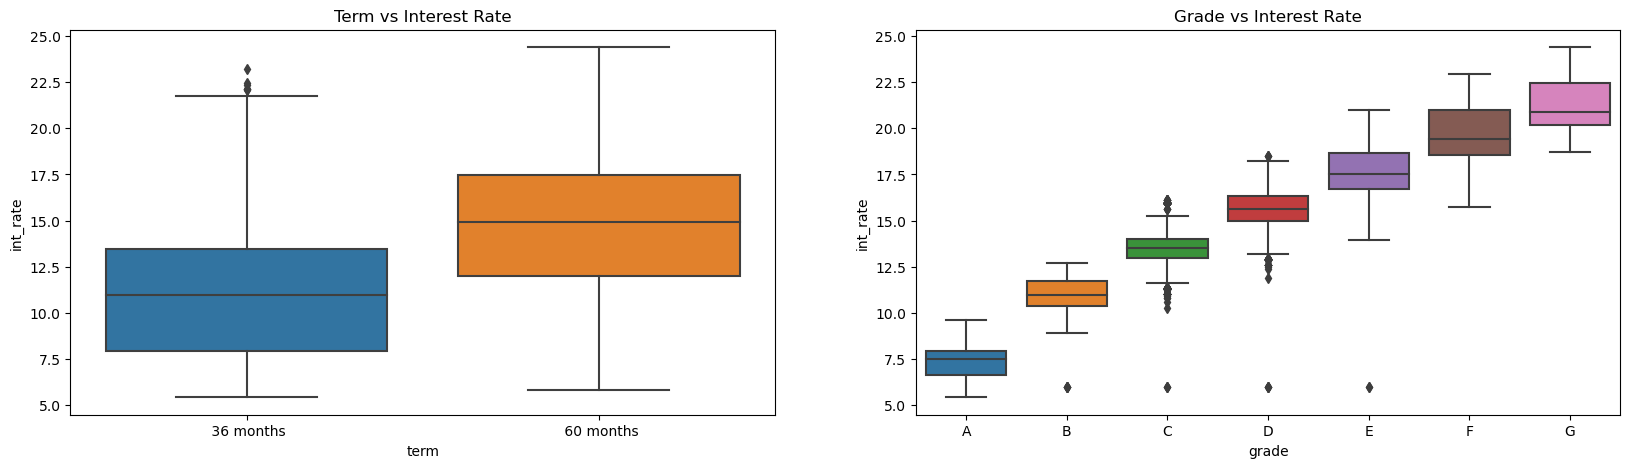

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

#### Observations: The intrest rates are higher for higher tenure loans and grades from 'A' to 'G' have higher intrest rates.

## home_ownership vs intrest_rate & verification status

<Axes: title={'center': 'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

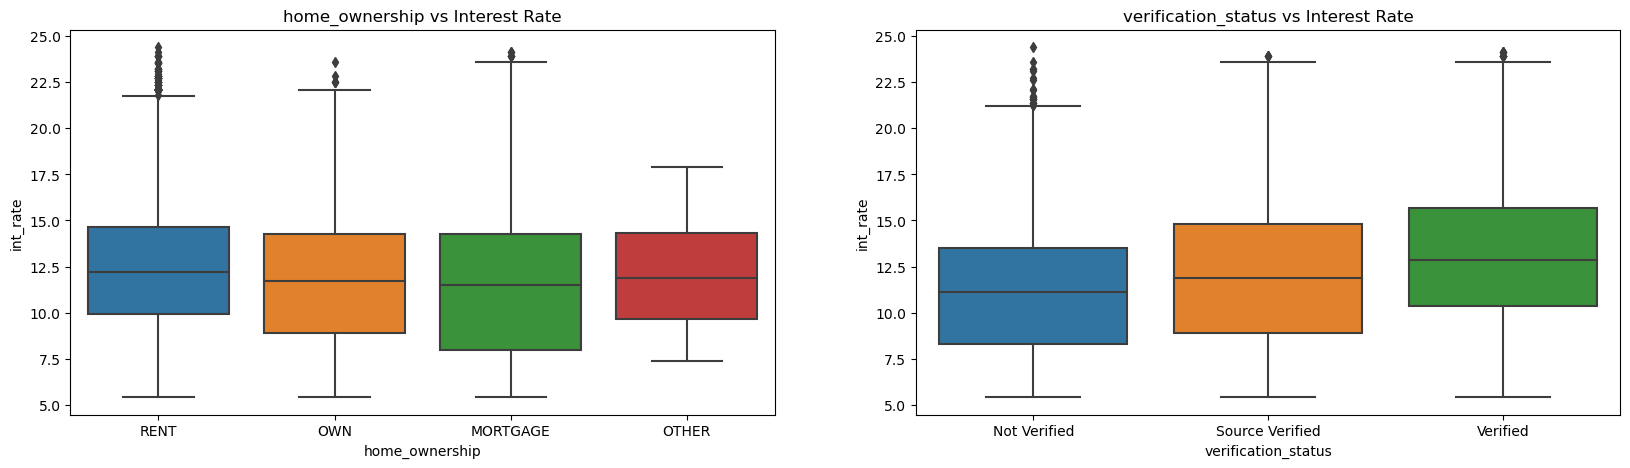

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.int_rate, order = verification_status_ord, data=data)

#### Observations: Borrowers lives in Own and Mortgage house have been issued loans with less intrest rate & Non verified borrowers got less interest rates than verified

## loan_status vs int_rate

Text(0.5, 1.0, 'loan_status vs Interest Rate')

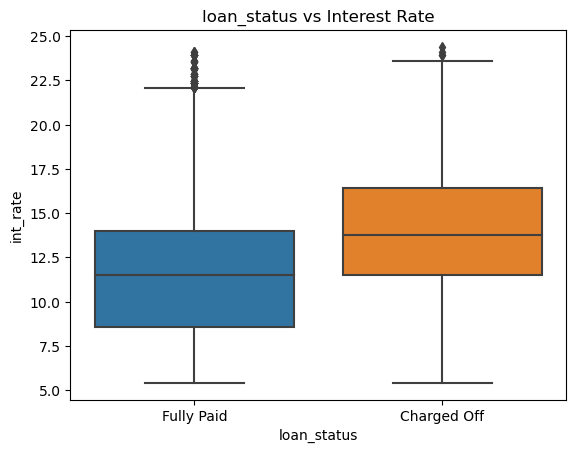

In [63]:
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

#### Observation: Higher intrest rate the higher chance of defaulting the loan.

## annual_inc

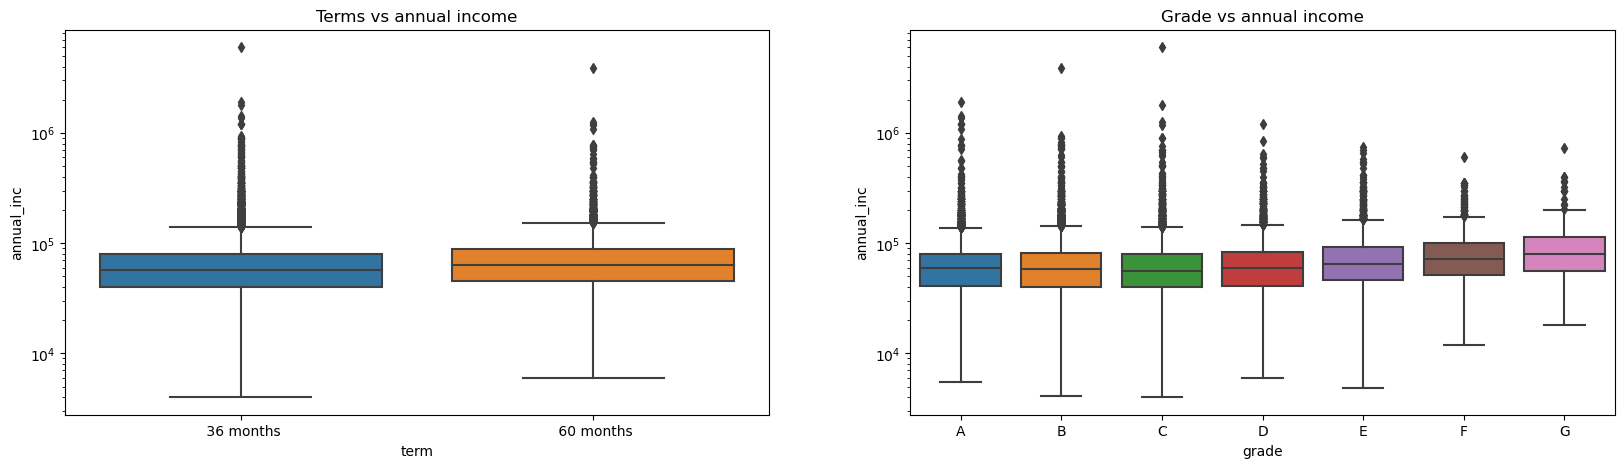

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')

#### Observations: Annual income is slightly increasing among the grades

## Home ownership vs annual_income

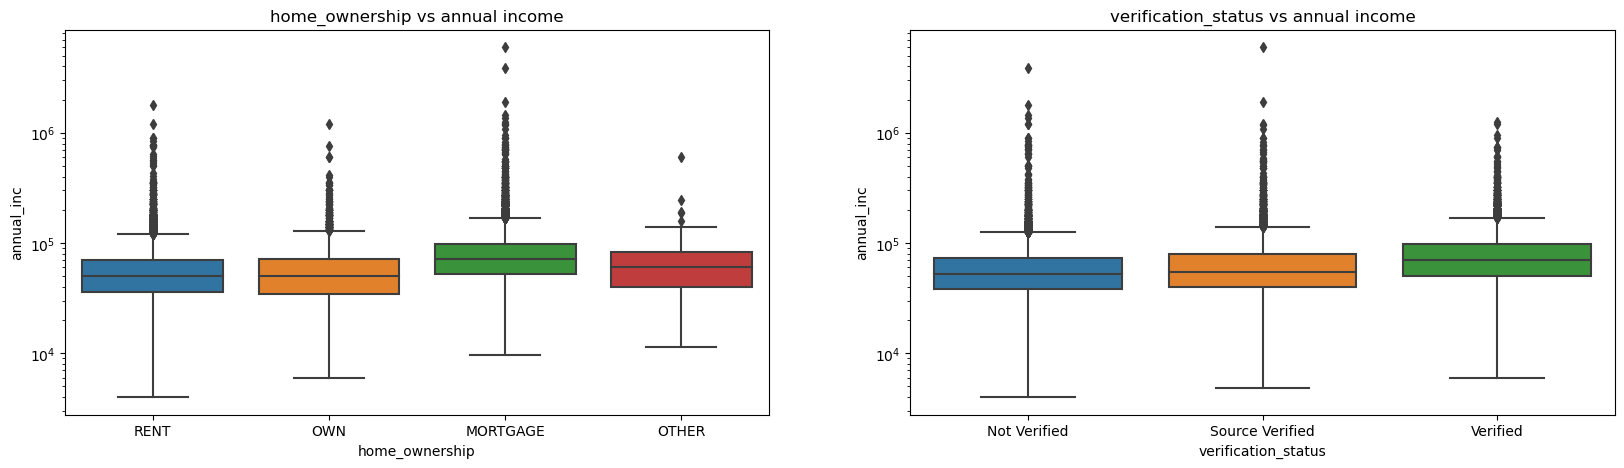

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

#### Observations: Mortgage home owners have higher income and income source was verfied for borrowers whom have higher income

## Purpose vs annual_income

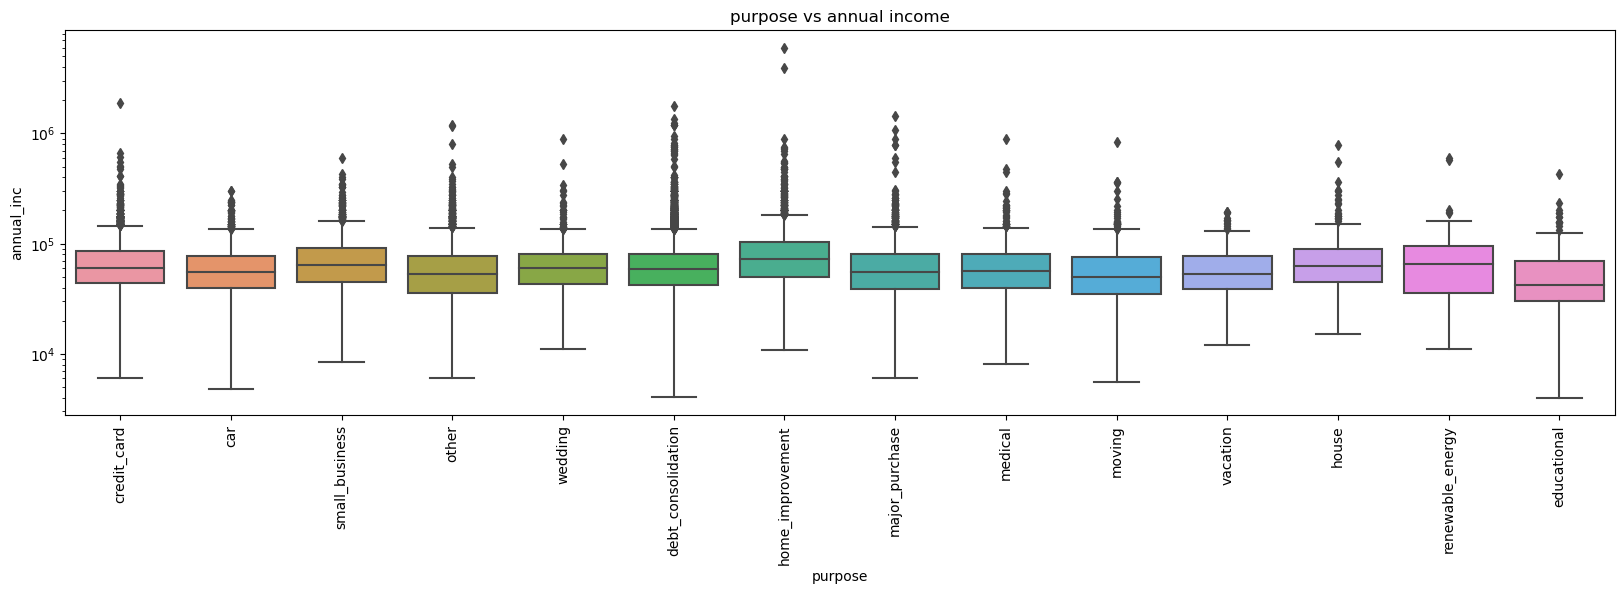

In [66]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

#### Observations: There is no much difference across puprose categories, but top 3 purpose categories are Renewable energy, small business and home improvements have higher income levels

## earliest_cr_line vs annual_income

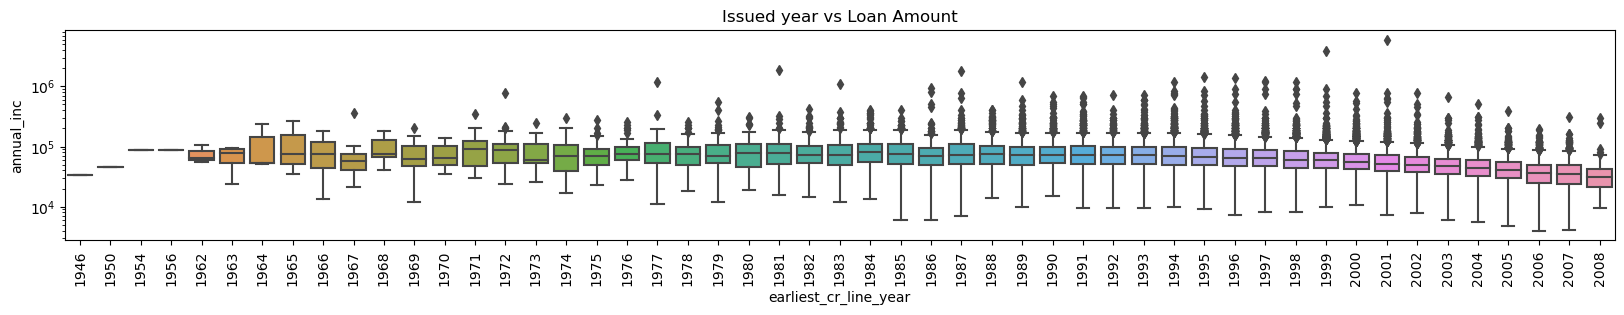

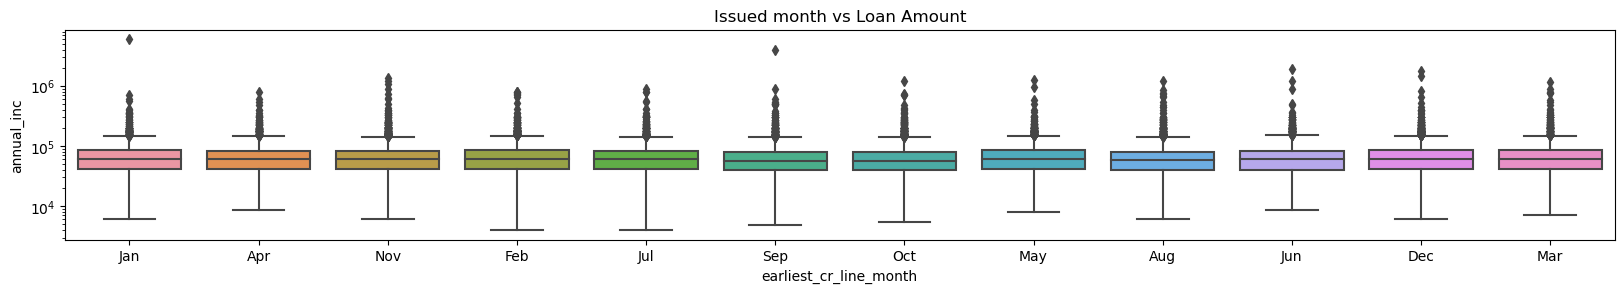

In [67]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.annual_inc, data=data)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

#### Observations: earliest_cr_line and annual_income doesn't have an intresting pattern 

## DTI 

<Axes: title={'center': 'Grade vs dti'}, xlabel='grade', ylabel='dti'>

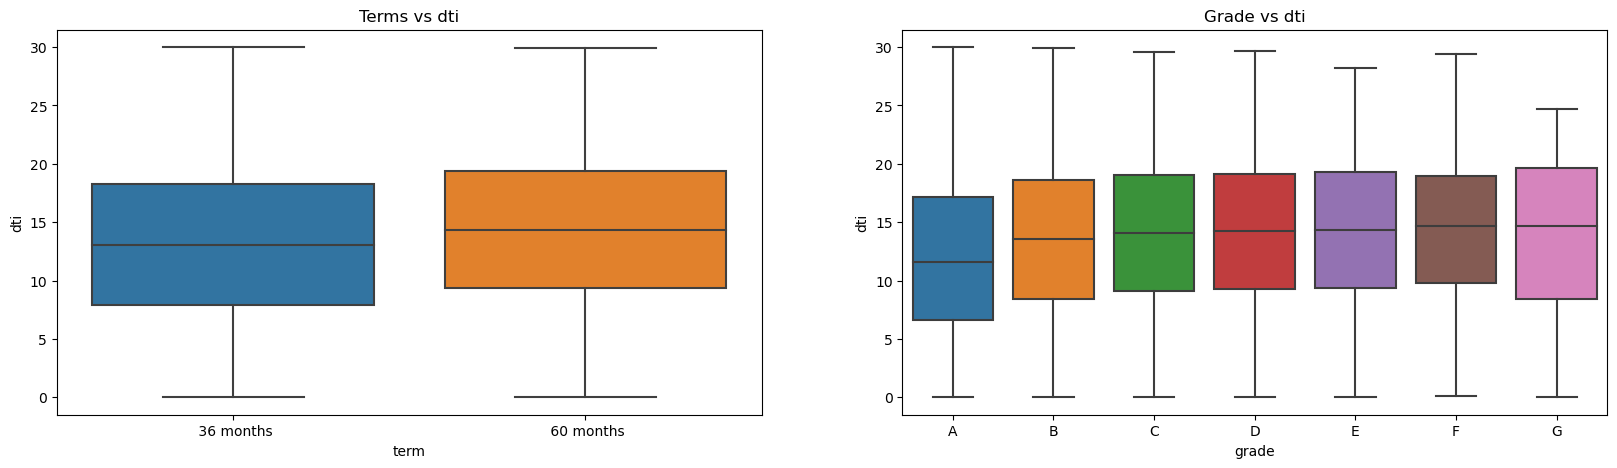

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)

#### Observations: DTI is higher for people who opted for higher tenure - 60 months and 'A' grade borrowers are havinf low DTI than other grades. For higher repayment percentage DTI should be low 

## DTI Vs loan_status

Text(0.5, 1.0, 'loan_status vs dti')

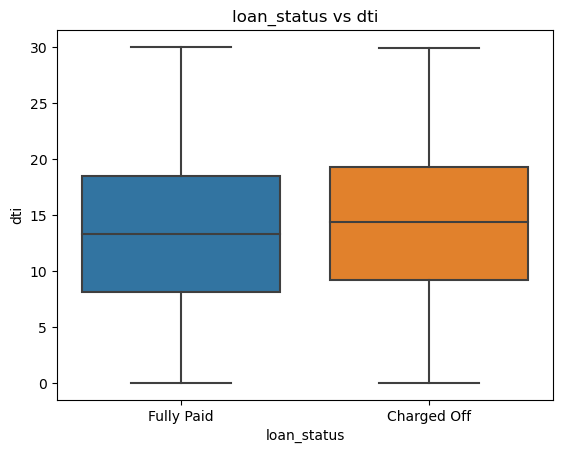

In [69]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')

#### Observations: Borrowers with high DTI are more tended to default

## Purpose vs DTI

Text(0.5, 1.0, 'purpose vs dti')

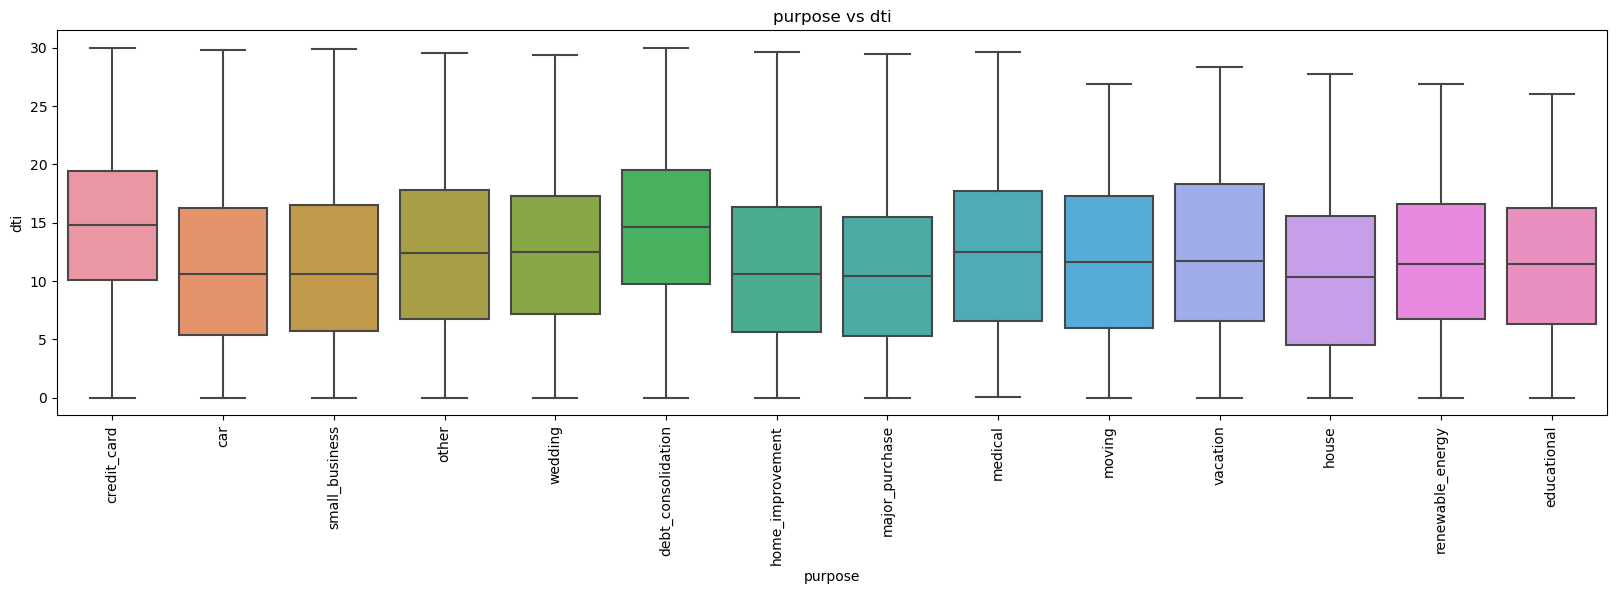

In [70]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

#### Observations: Borrowers who took loan for Credit card and debt_consolidation have more DTI than other purposes.

## pub_rec

#### No.of derogatory public records

In [72]:
df = data.groupby(['pub_rec', 'term'], as_index=False)['id'].count() # using groupby with term and pub_rec
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\618381887.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


pub_rec        term     id  proportion
0        0   36 months  26152    0.749964
1        0   60 months   8719    0.250036
2        1   36 months   1349    0.719467
3        1   60 months    526    0.280533
4        2   36 months     36    0.800000
5        2   60 months      9    0.200000
6        3   36 months      7    1.000000
7        4   36 months      2    1.000000

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\99024810.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


<Axes: title={'center': 'Grade vs Public records'}, xlabel='pub_rec', ylabel='proportion'>

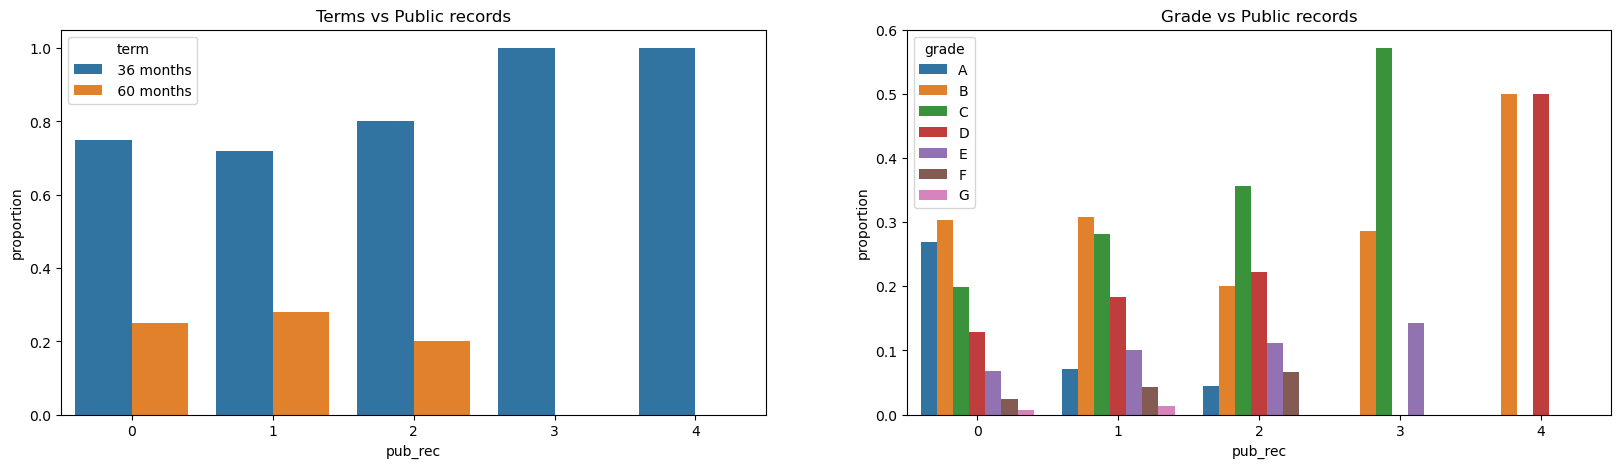

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

#### Observations: Borrowers with higher public derogatory records took loan for 36 months tenure, distribution range is 80% and 20% between 36 and 60 months respectively
#### 'C', 'D', 'E' graded people have higher derogatory pub_records

## Verification_status vs Pub_rec

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\1804208722.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\1804208722.py:10: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Verification status vs Public records')

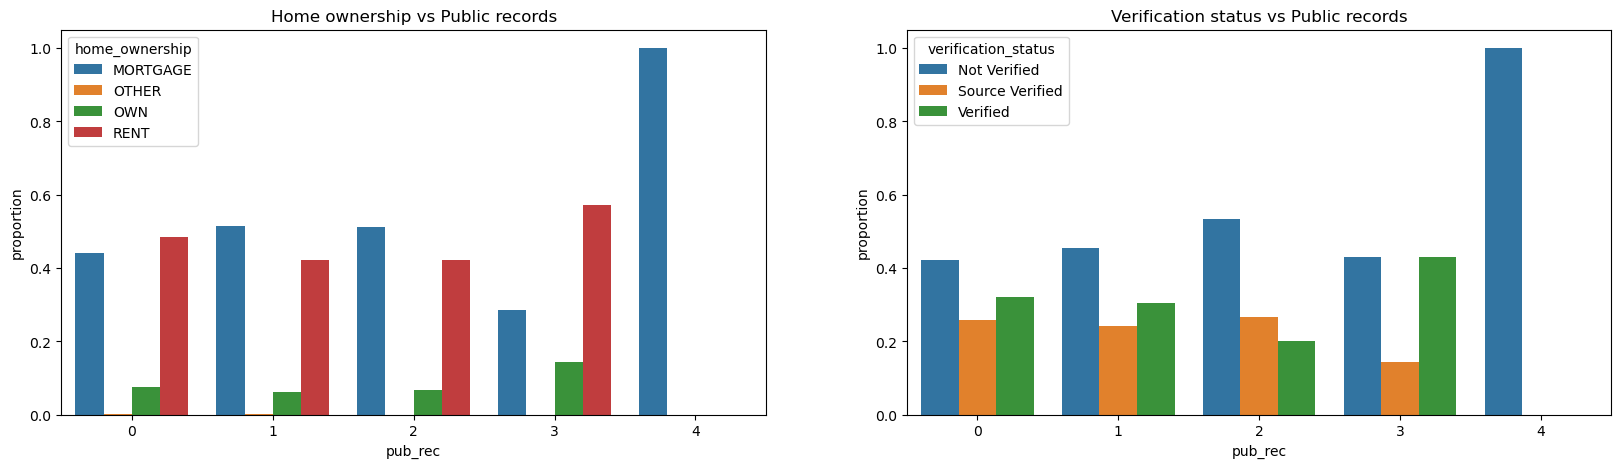

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records')

#### Observations: Borrowers with 4 pub-records are living in mortgage owned houses and also in Not verified category

## inq_last_6mths

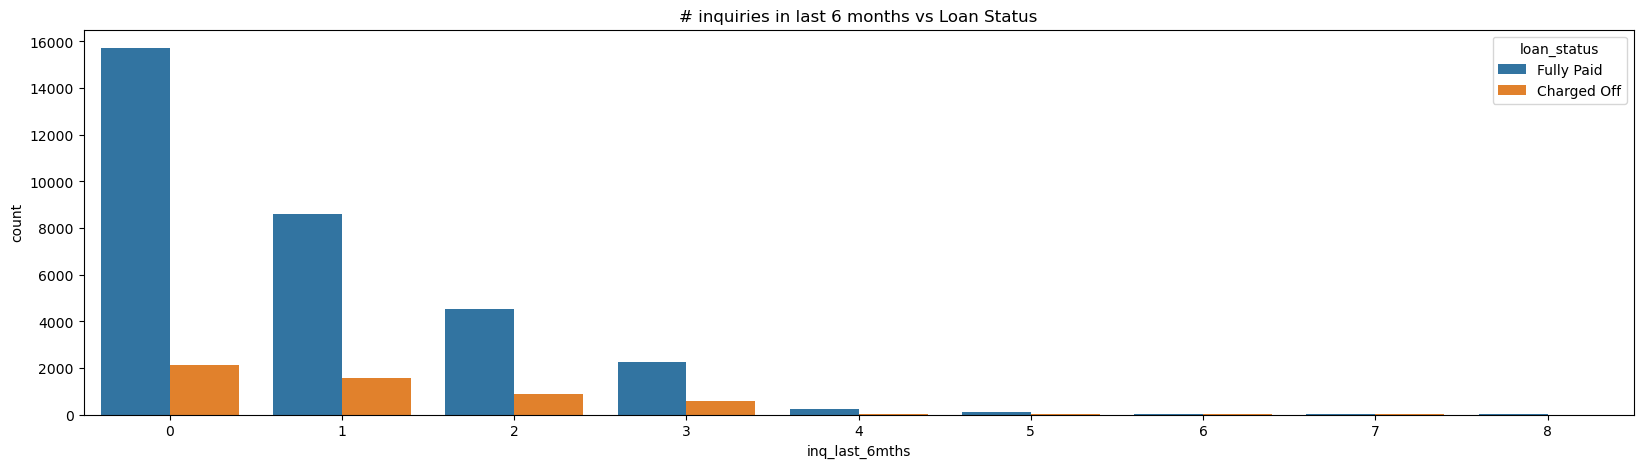

In [75]:
plt.figure(figsize=(20,5))
sns.countplot(x='inq_last_6mths', hue='loan_status', data=data)
plt.title('# inquiries in last 6 months vs Loan Status')
plt.show()

## Approval Loan Amount Ratio

Text(0.5, 1.0, 'emp_length vs Approval Loan Amount Ratio')

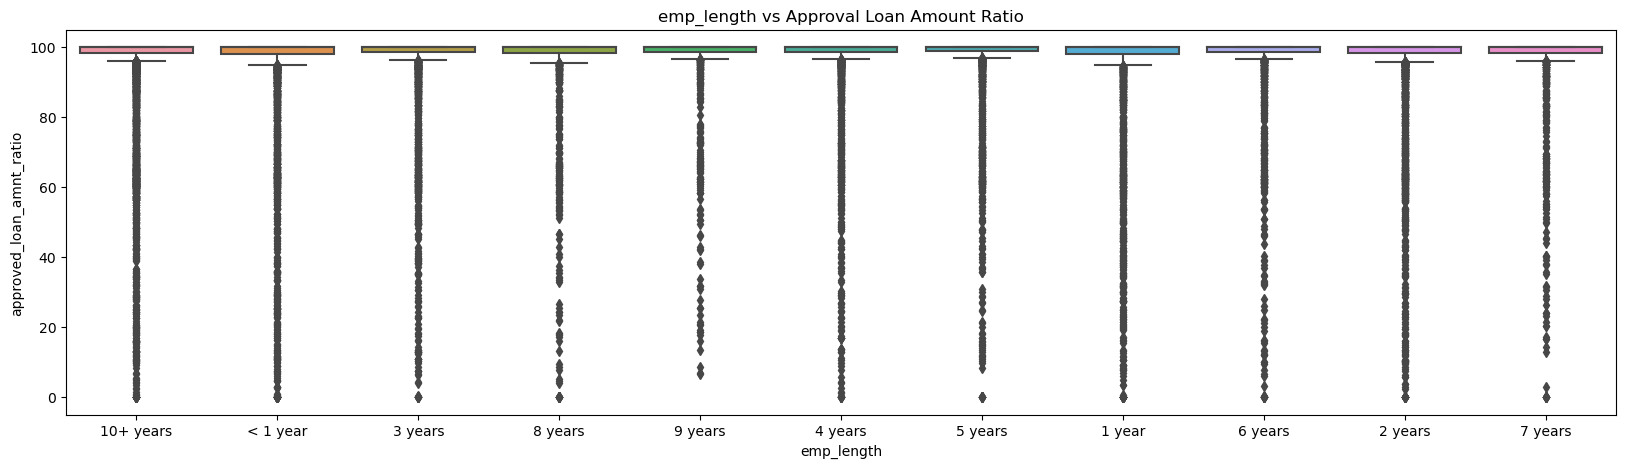

In [76]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.approved_loan_amnt_ratio, data=data)
plt.title('emp_length vs Approval Loan Amount Ratio')

#### Observations: The pattern has no much difference on emp_length and loan_approval

## Home_ownership vs Approval loan amount ratio

Text(0.5, 1.0, 'Home Ownership vs Approval Loan Amount Ratio')

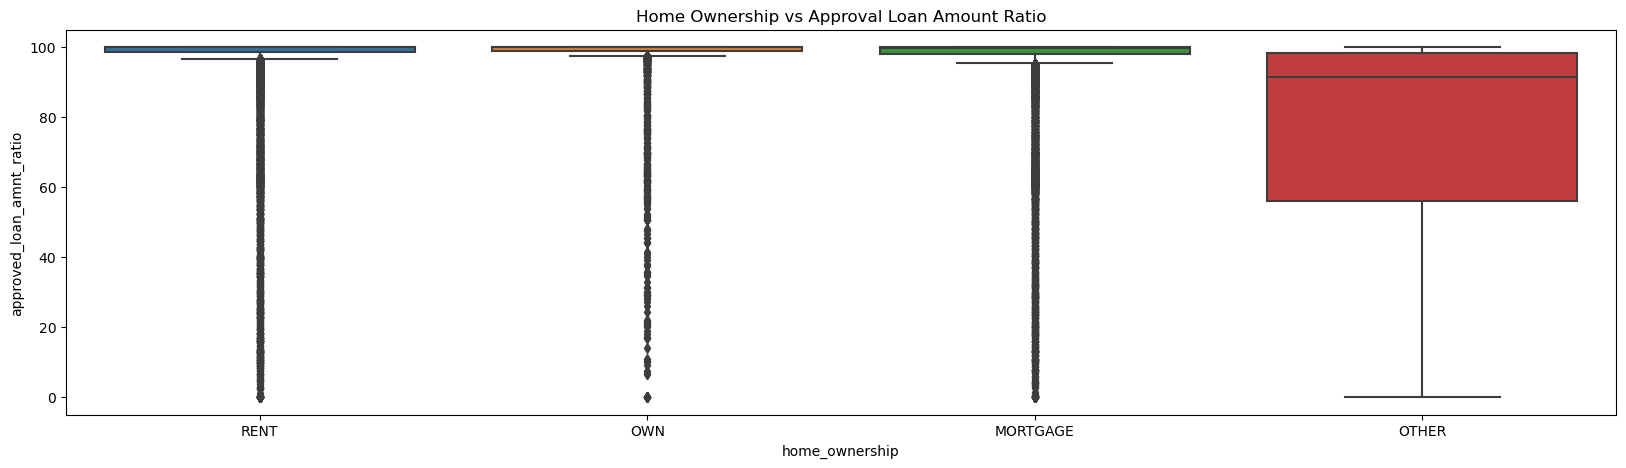

In [77]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=data.approved_loan_amnt_ratio, data=data)
plt.title('Home Ownership vs Approval Loan Amount Ratio')

#### Observations: Borrowers with Home_ownership category other are having less approval loan ratio

# Bivariate Analysis

## Term vs Loan_status

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\4265211463.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Term vs Loan status')

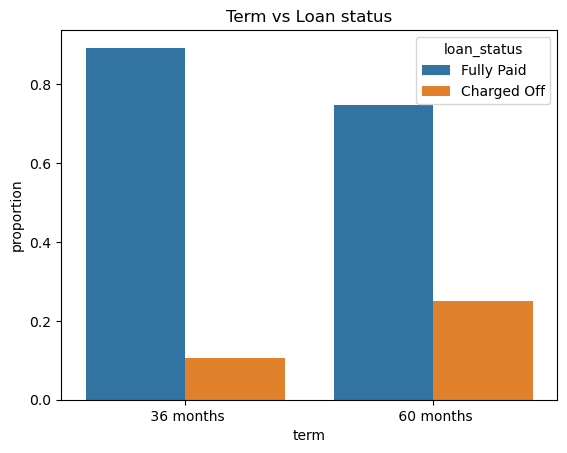

In [78]:
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

#### Observations: Defaulted loans are more in 60 months term, comparetively fully paid loans are more in 36 months tenure

## term vs int_rate

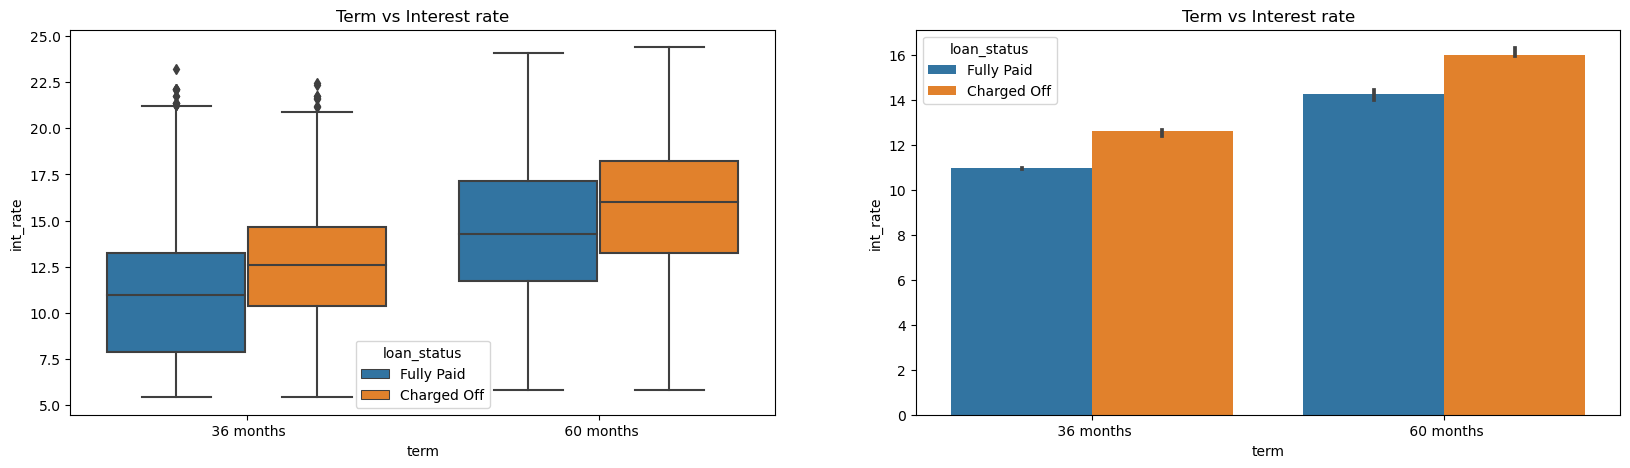

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

#### Observations: For higher int_rates the loan default rate is higher in both terms

## term vs DTI

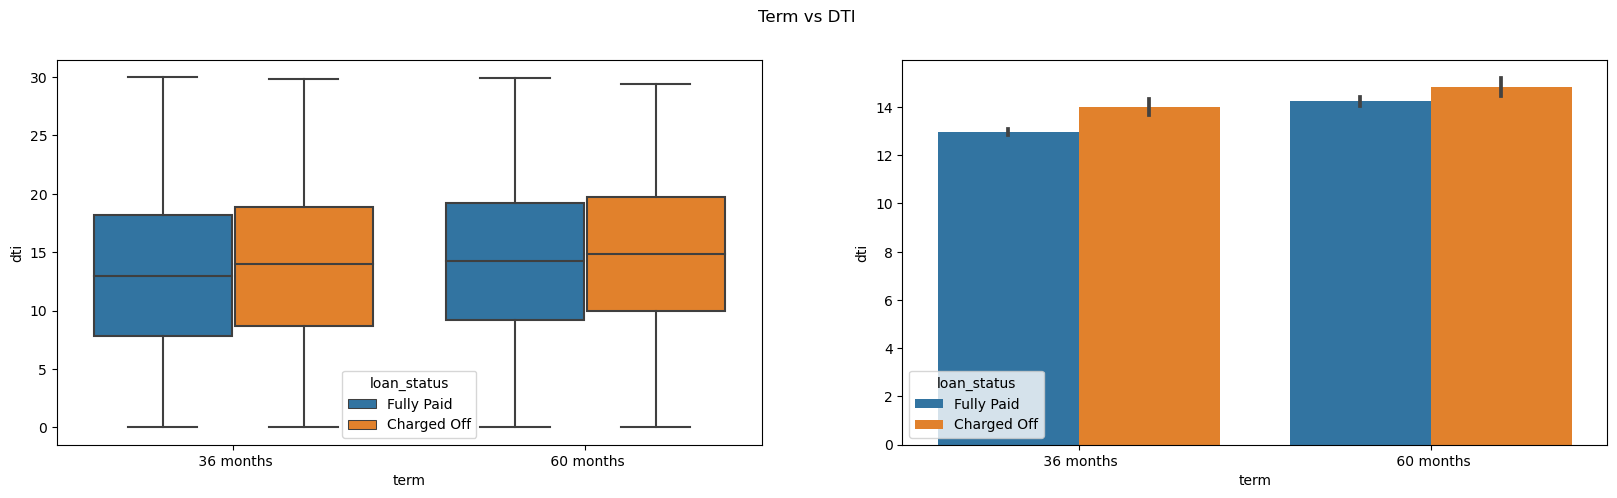

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

#### Observations: Comparitively charged off loans are higher tahn fully paid loans for DTI

## term vs loan_amnt

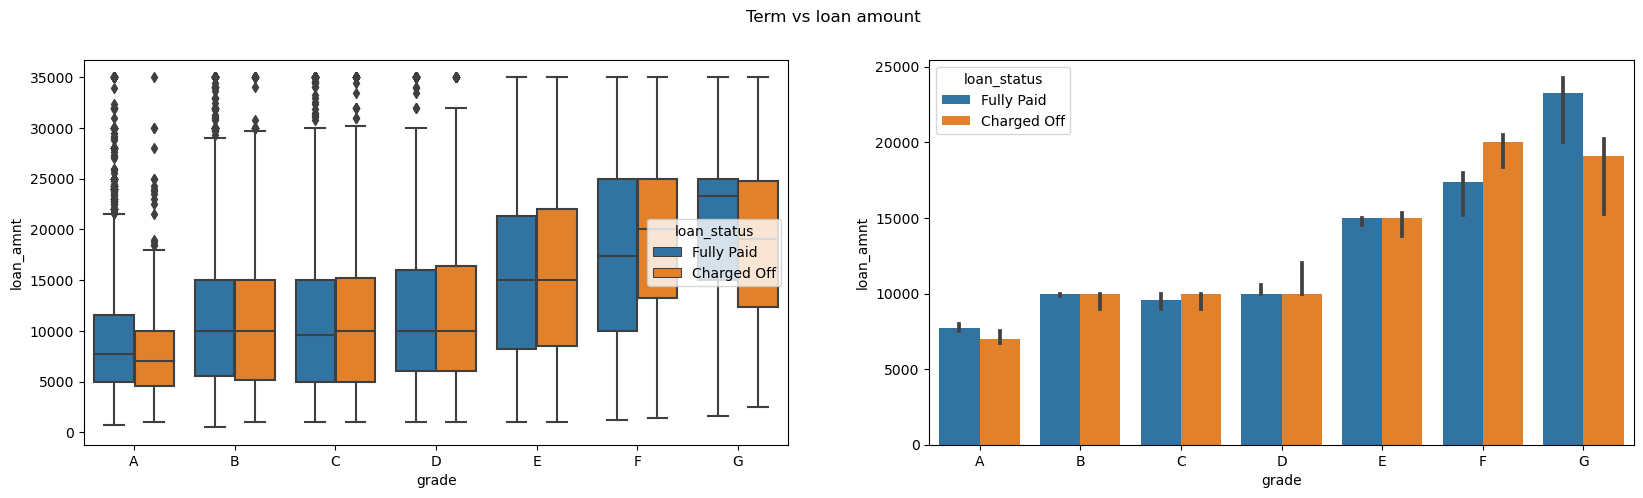

In [81]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

## Grade vs DTI

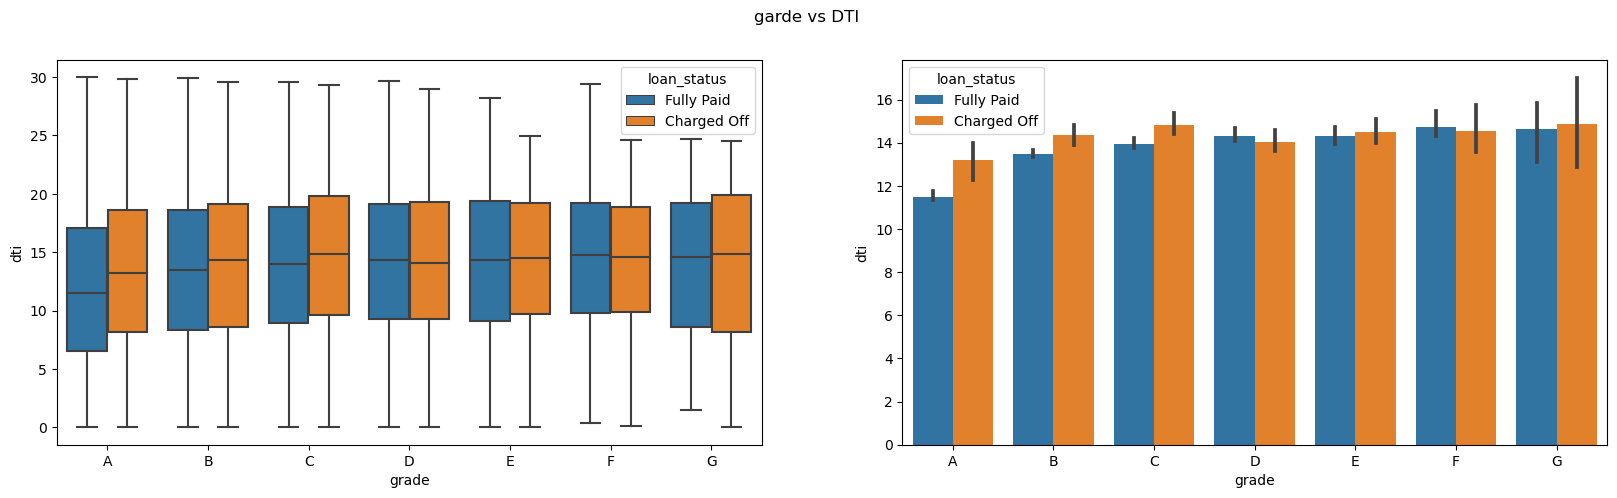

In [82]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

## Employee length

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\3756688468.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

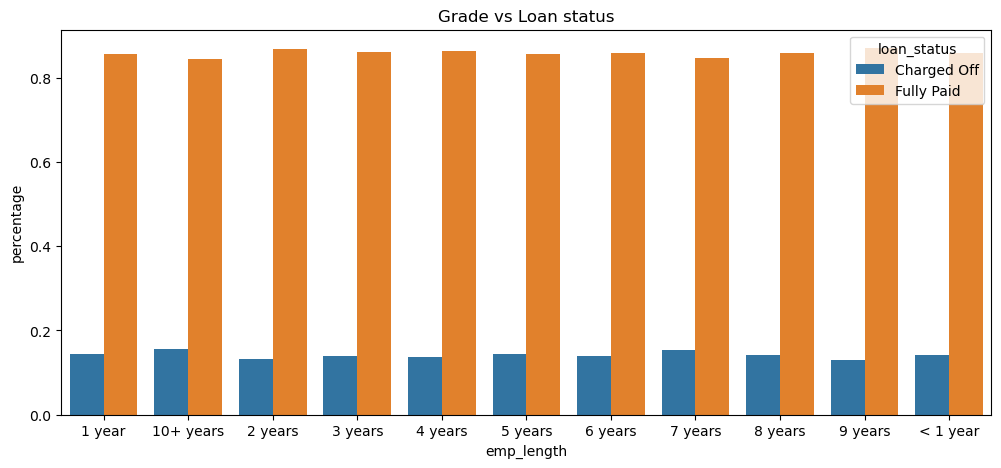

In [83]:
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

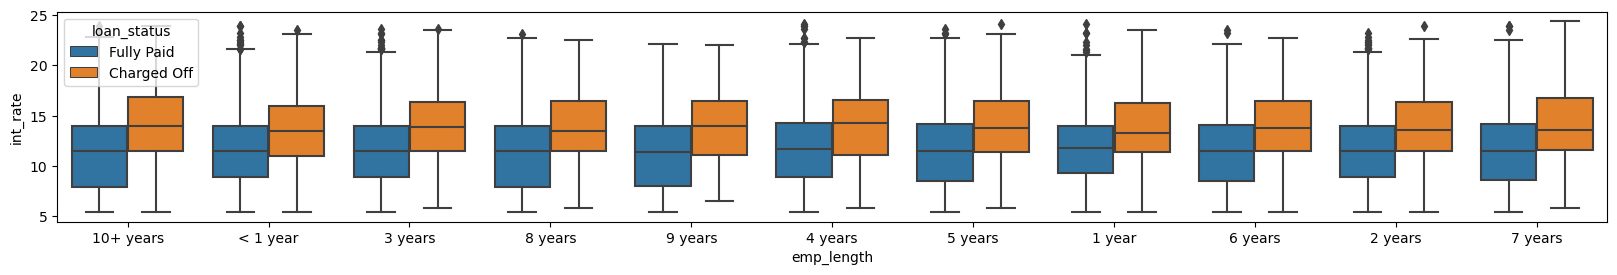

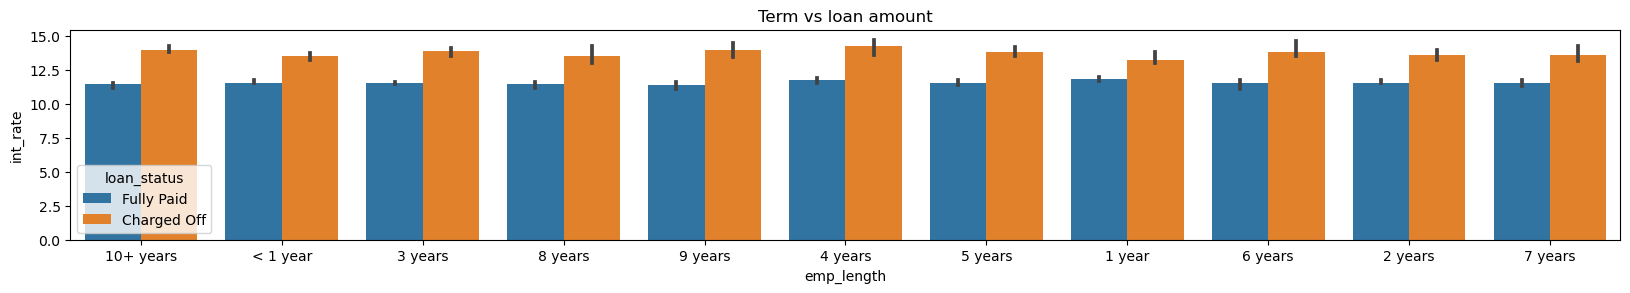

In [84]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

#### Observations: Irrespective of employee_length more intrest rate loans got defaulted more

## Home_ownership vs loan_amnt

C:\Users\bhargav\AppData\Local\Temp\ipykernel_13040\2695638706.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Home Ownership vs Loan status')

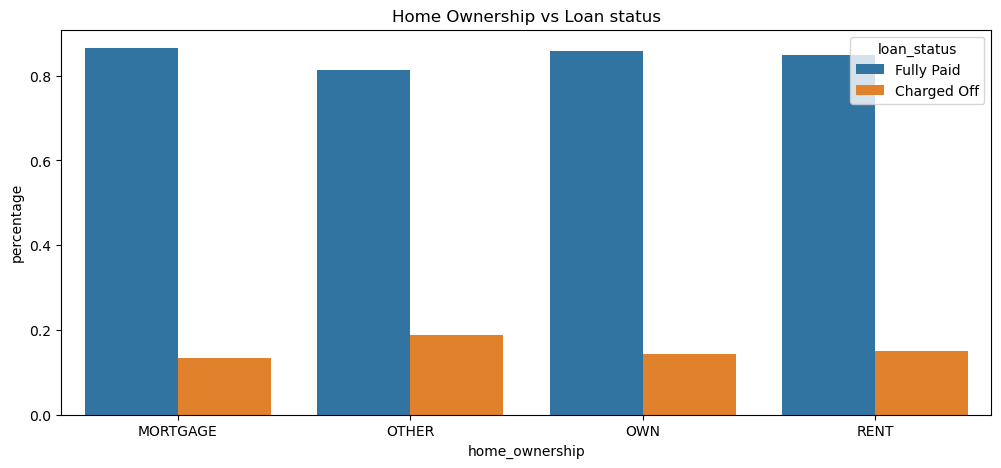

In [106]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

#### Observations: Other  in home_ownership category borrowers more likely to default

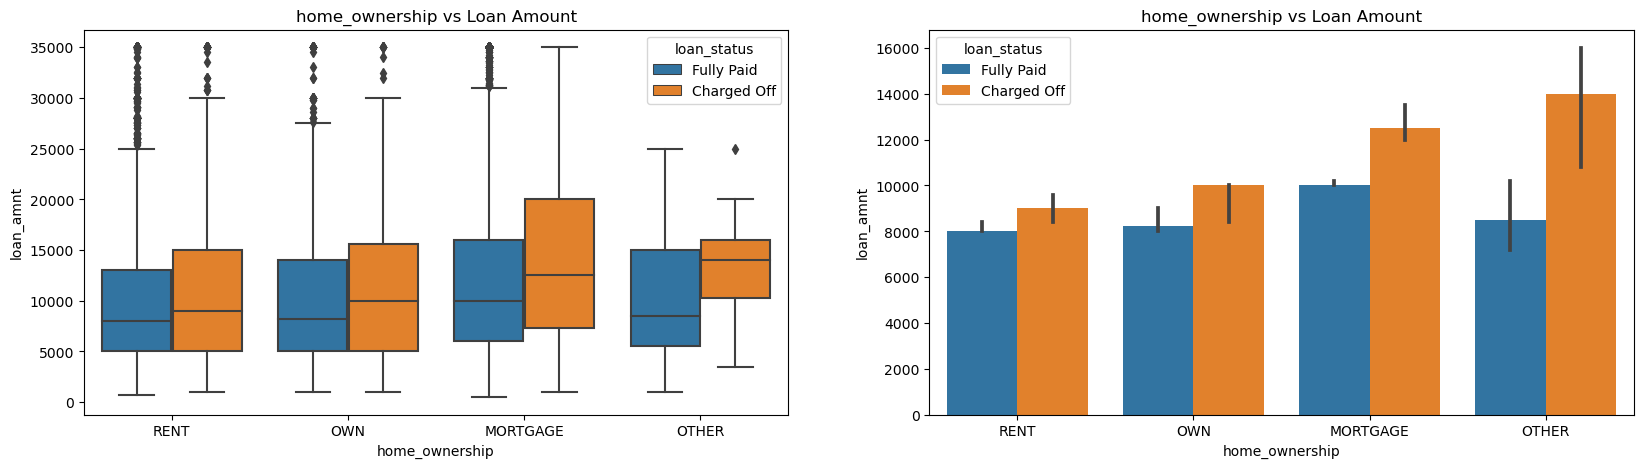

In [85]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

#### Observations: Borrowers who took higher loans are defaulted than others

## Address State 

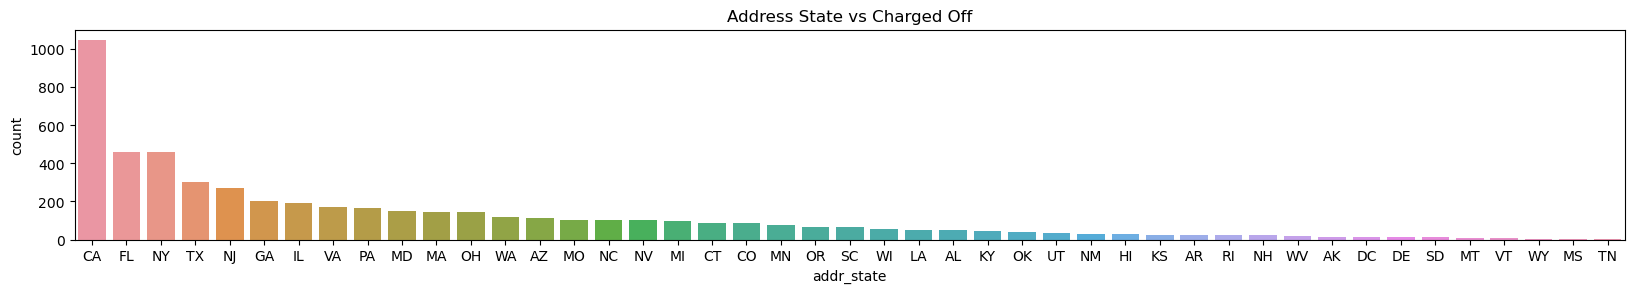

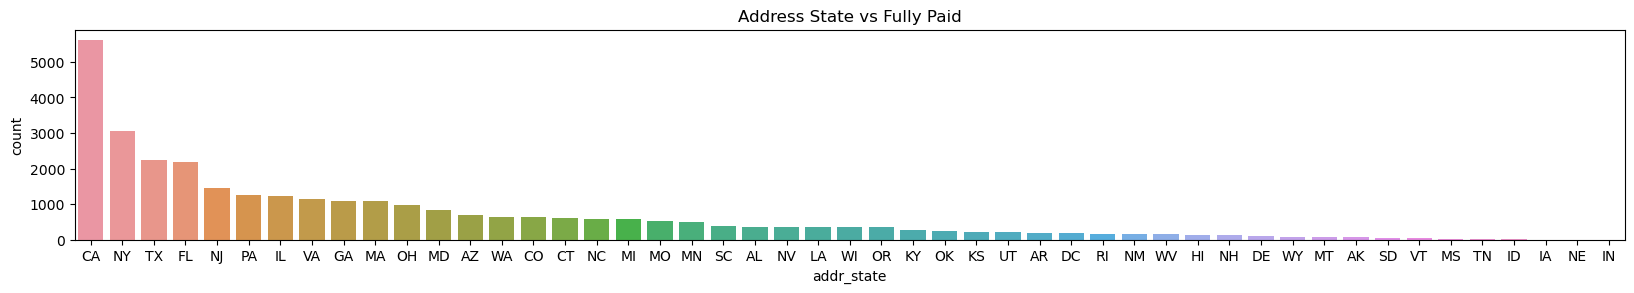

In [86]:
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

#### Observations: CA, FL and NY are top defaulted states

## Verification_status

C:\Users\bhargav\AppData\Local\Temp\ipykernel_22208\3592038875.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

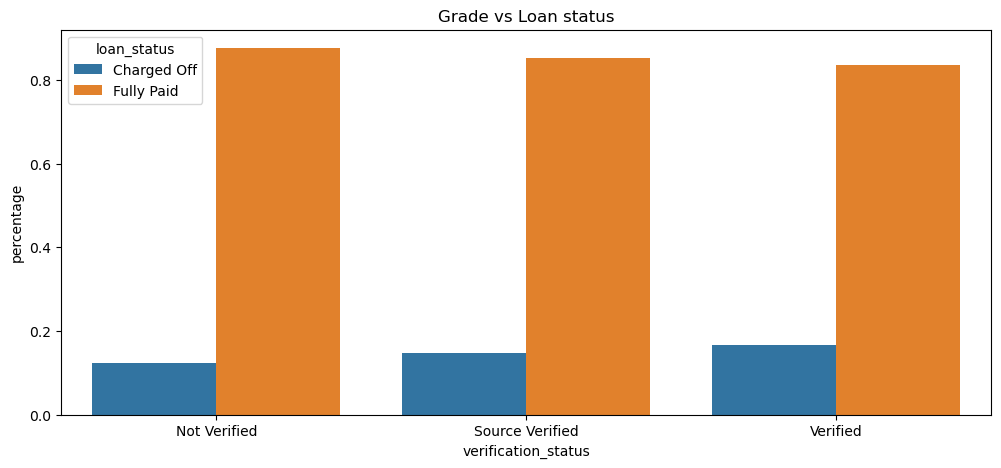

In [87]:
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

## verification status vs DTI

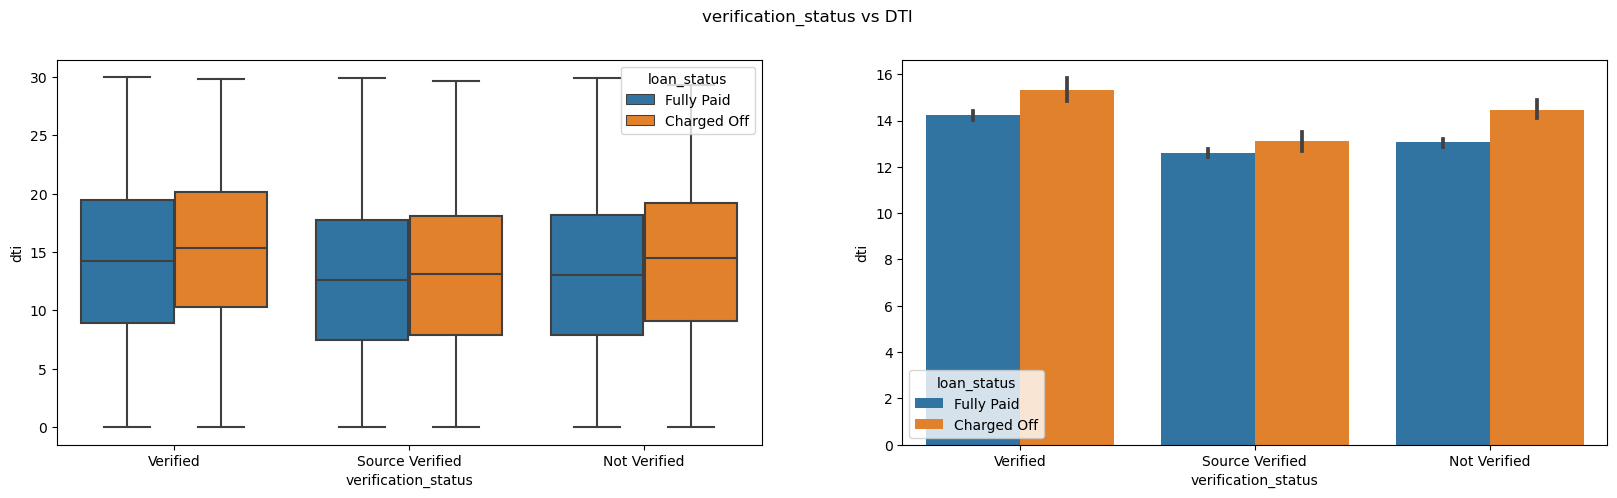

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

#### Observations: Slight increase in DTI mean for defaulted loans for all verification status categories

## Purpose

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

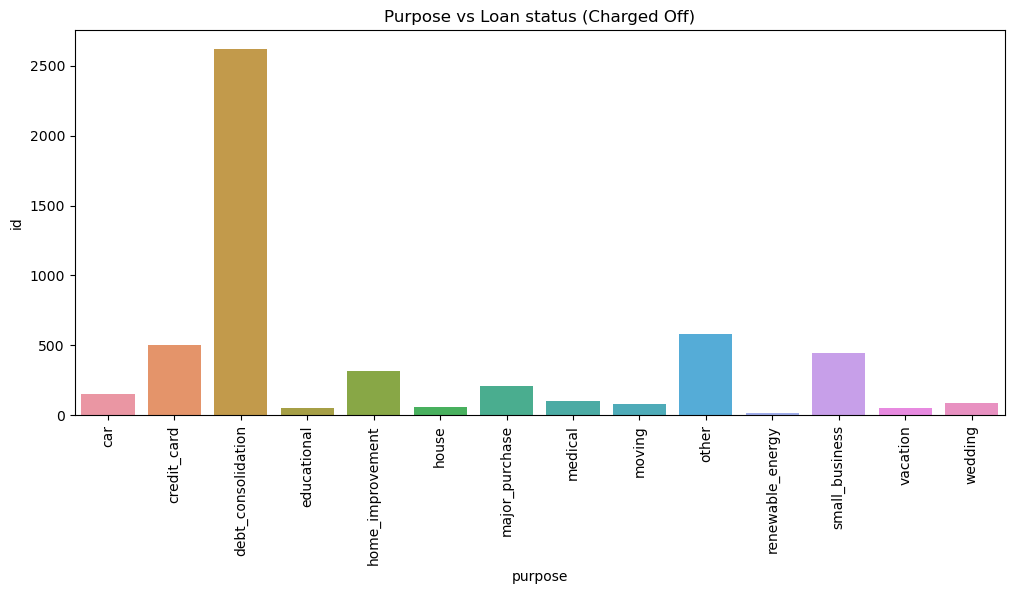

In [108]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='id', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

In [106]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df = df[df.loan_status == 'Charged Off']
df

purpose  loan_status    id
0                  car  Charged Off   151
2          credit_card  Charged Off   501
4   debt_consolidation  Charged Off  2623
6          educational  Charged Off    49
8     home_improvement  Charged Off   319
10               house  Charged Off    58
12      major_purchase  Charged Off   206
14             medical  Charged Off    99
16              moving  Charged Off    81
18               other  Charged Off   578
20    renewable_energy  Charged Off    18
22      small_business  Charged Off   444
24            vacation  Charged Off    50
26             wedding  Charged Off    89

#### Observations: Charged off loans are higher for debt_consolidation category

In [102]:
data.shape

(36800, 37)

## purpose vs loan_status

<Figure size 640x480 with 0 Axes>

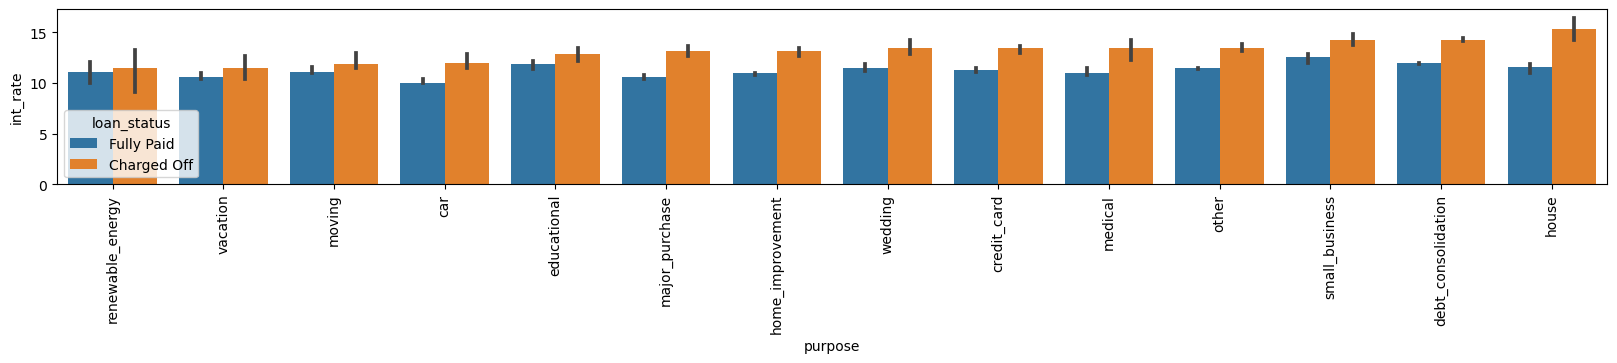

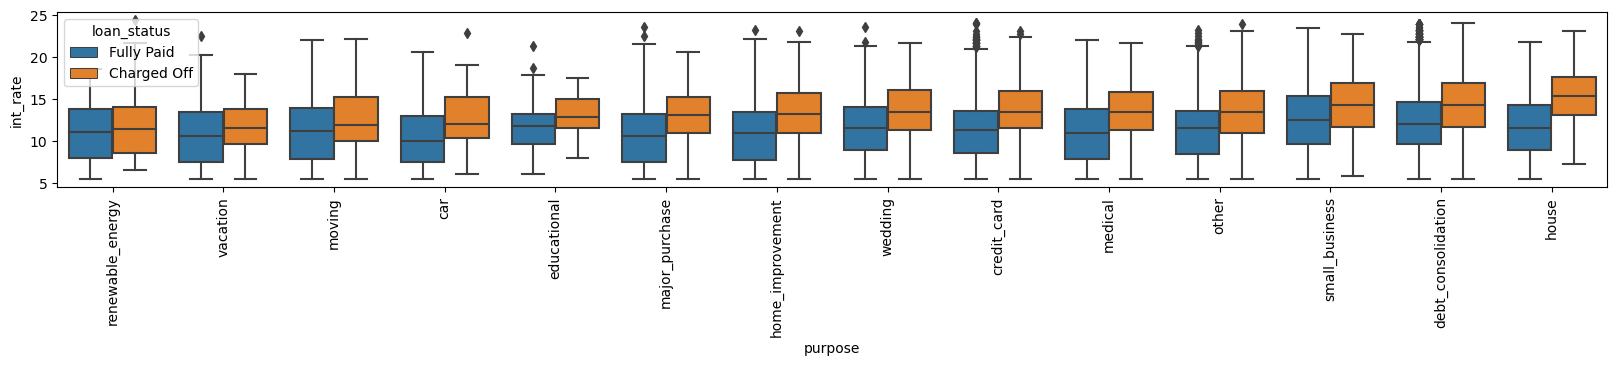

In [112]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= data, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

#### Observations: Home loans with high intrest rates are defaulted, same observation on small_business and debt_consolidation

## Scatterplot on loan_amnt vs int_rate

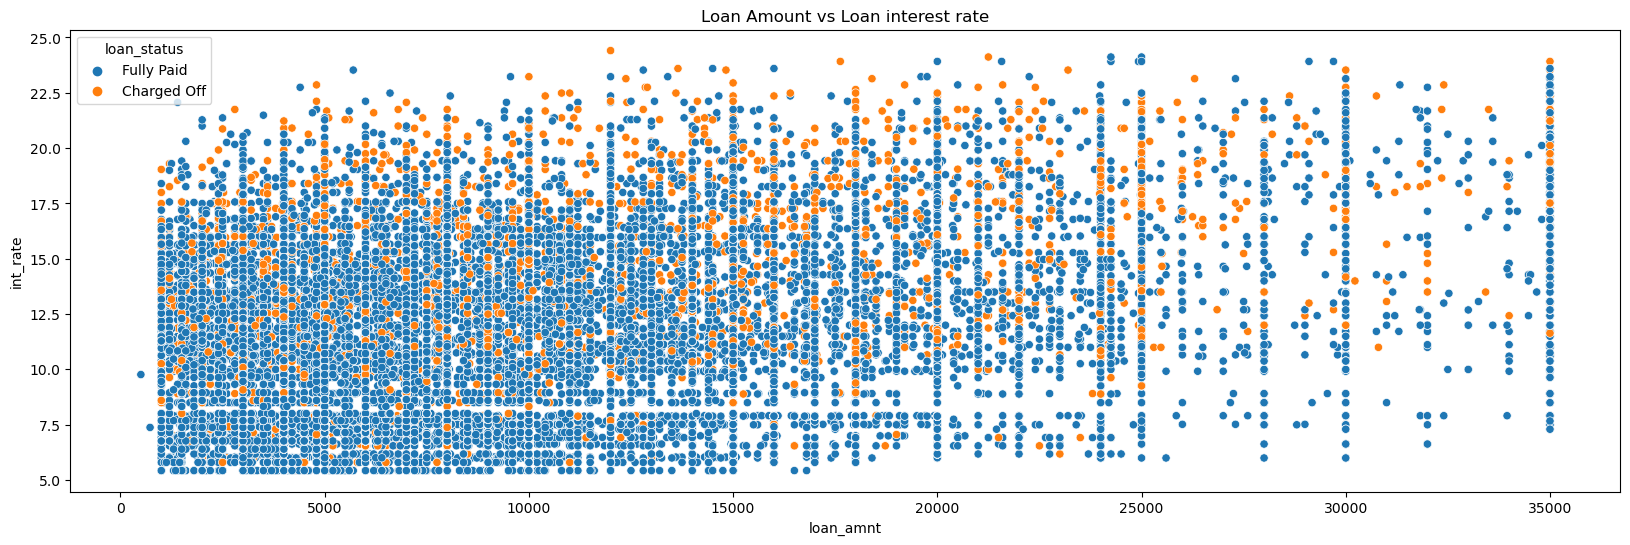

In [113]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

#### Observations: Values are spread across, no specific pattern noticed

## Scatterplot on Loan_amnt vs annual_income

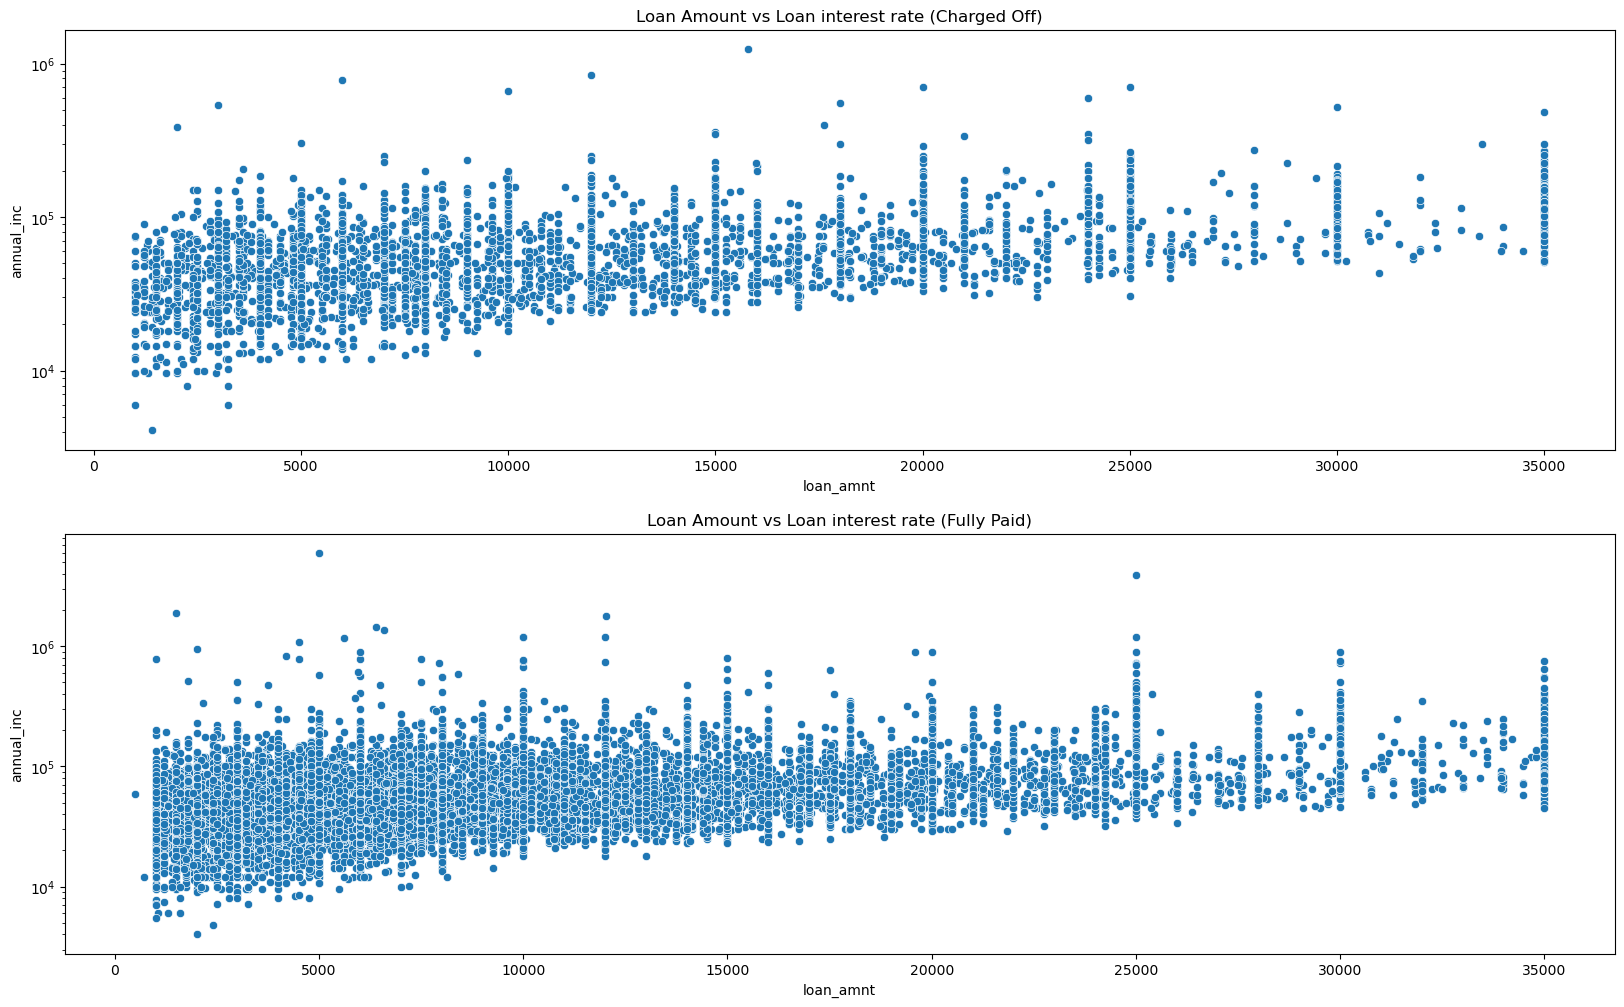

In [114]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

#### Observations: Both Fully paid and charged off loans are having similar pattern vs annual_income

## Scatterplot Loan_amnt vs DTI

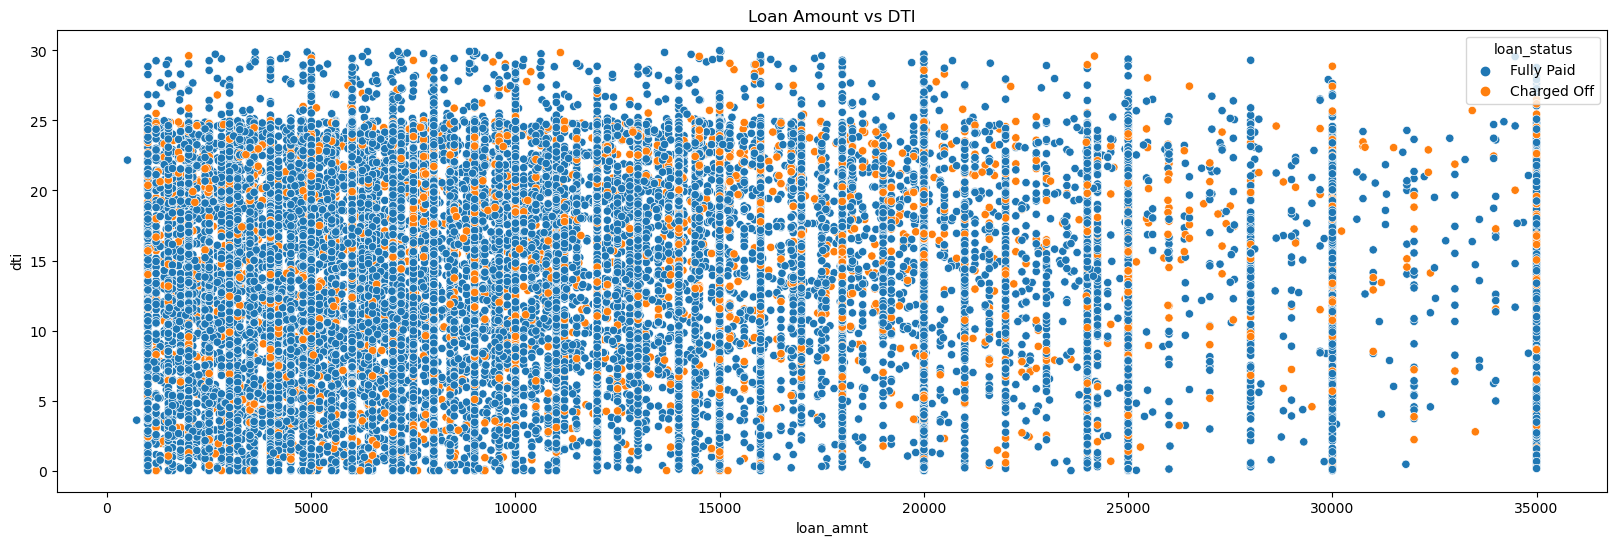

In [115]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=data, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

#### Observations: Values are spread across

## Scatterplot int_rate vs DTI

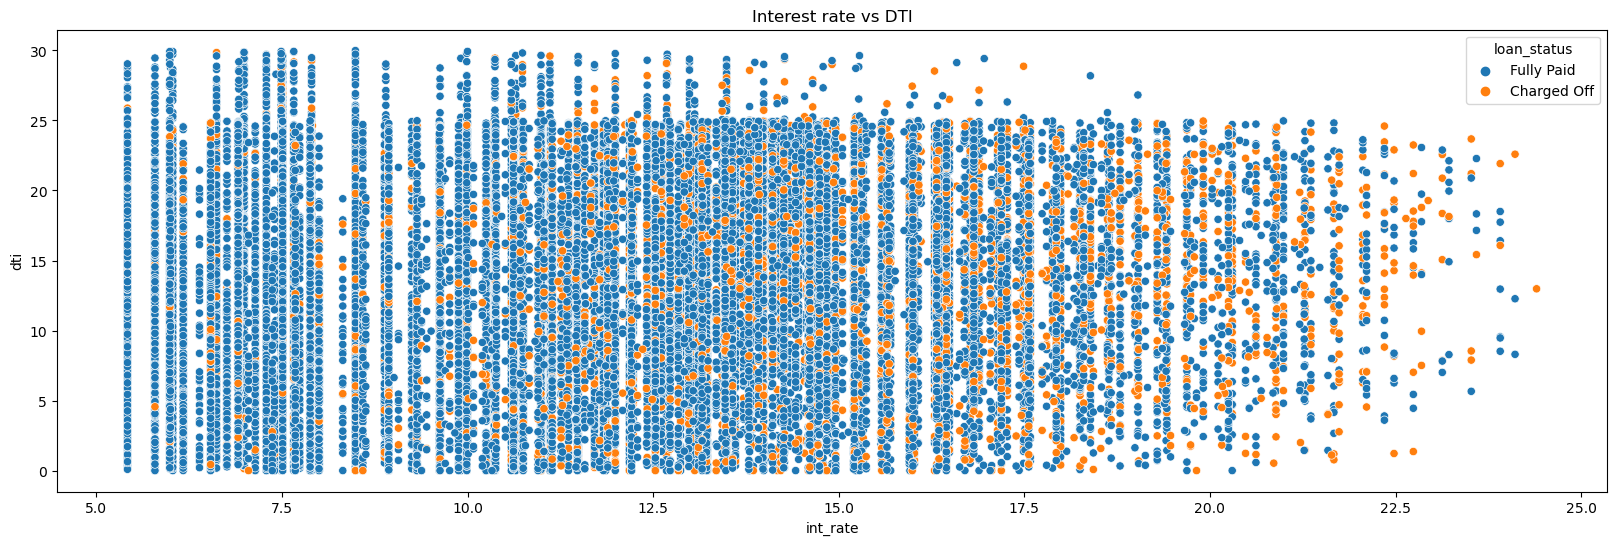

In [116]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=data, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

#### Observations: values are spread across

## Correlation Matrix b/w variables & columns in dataframe

C:\Users\bhargav\AppData\Local\Temp\ipykernel_13040\1939776479.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


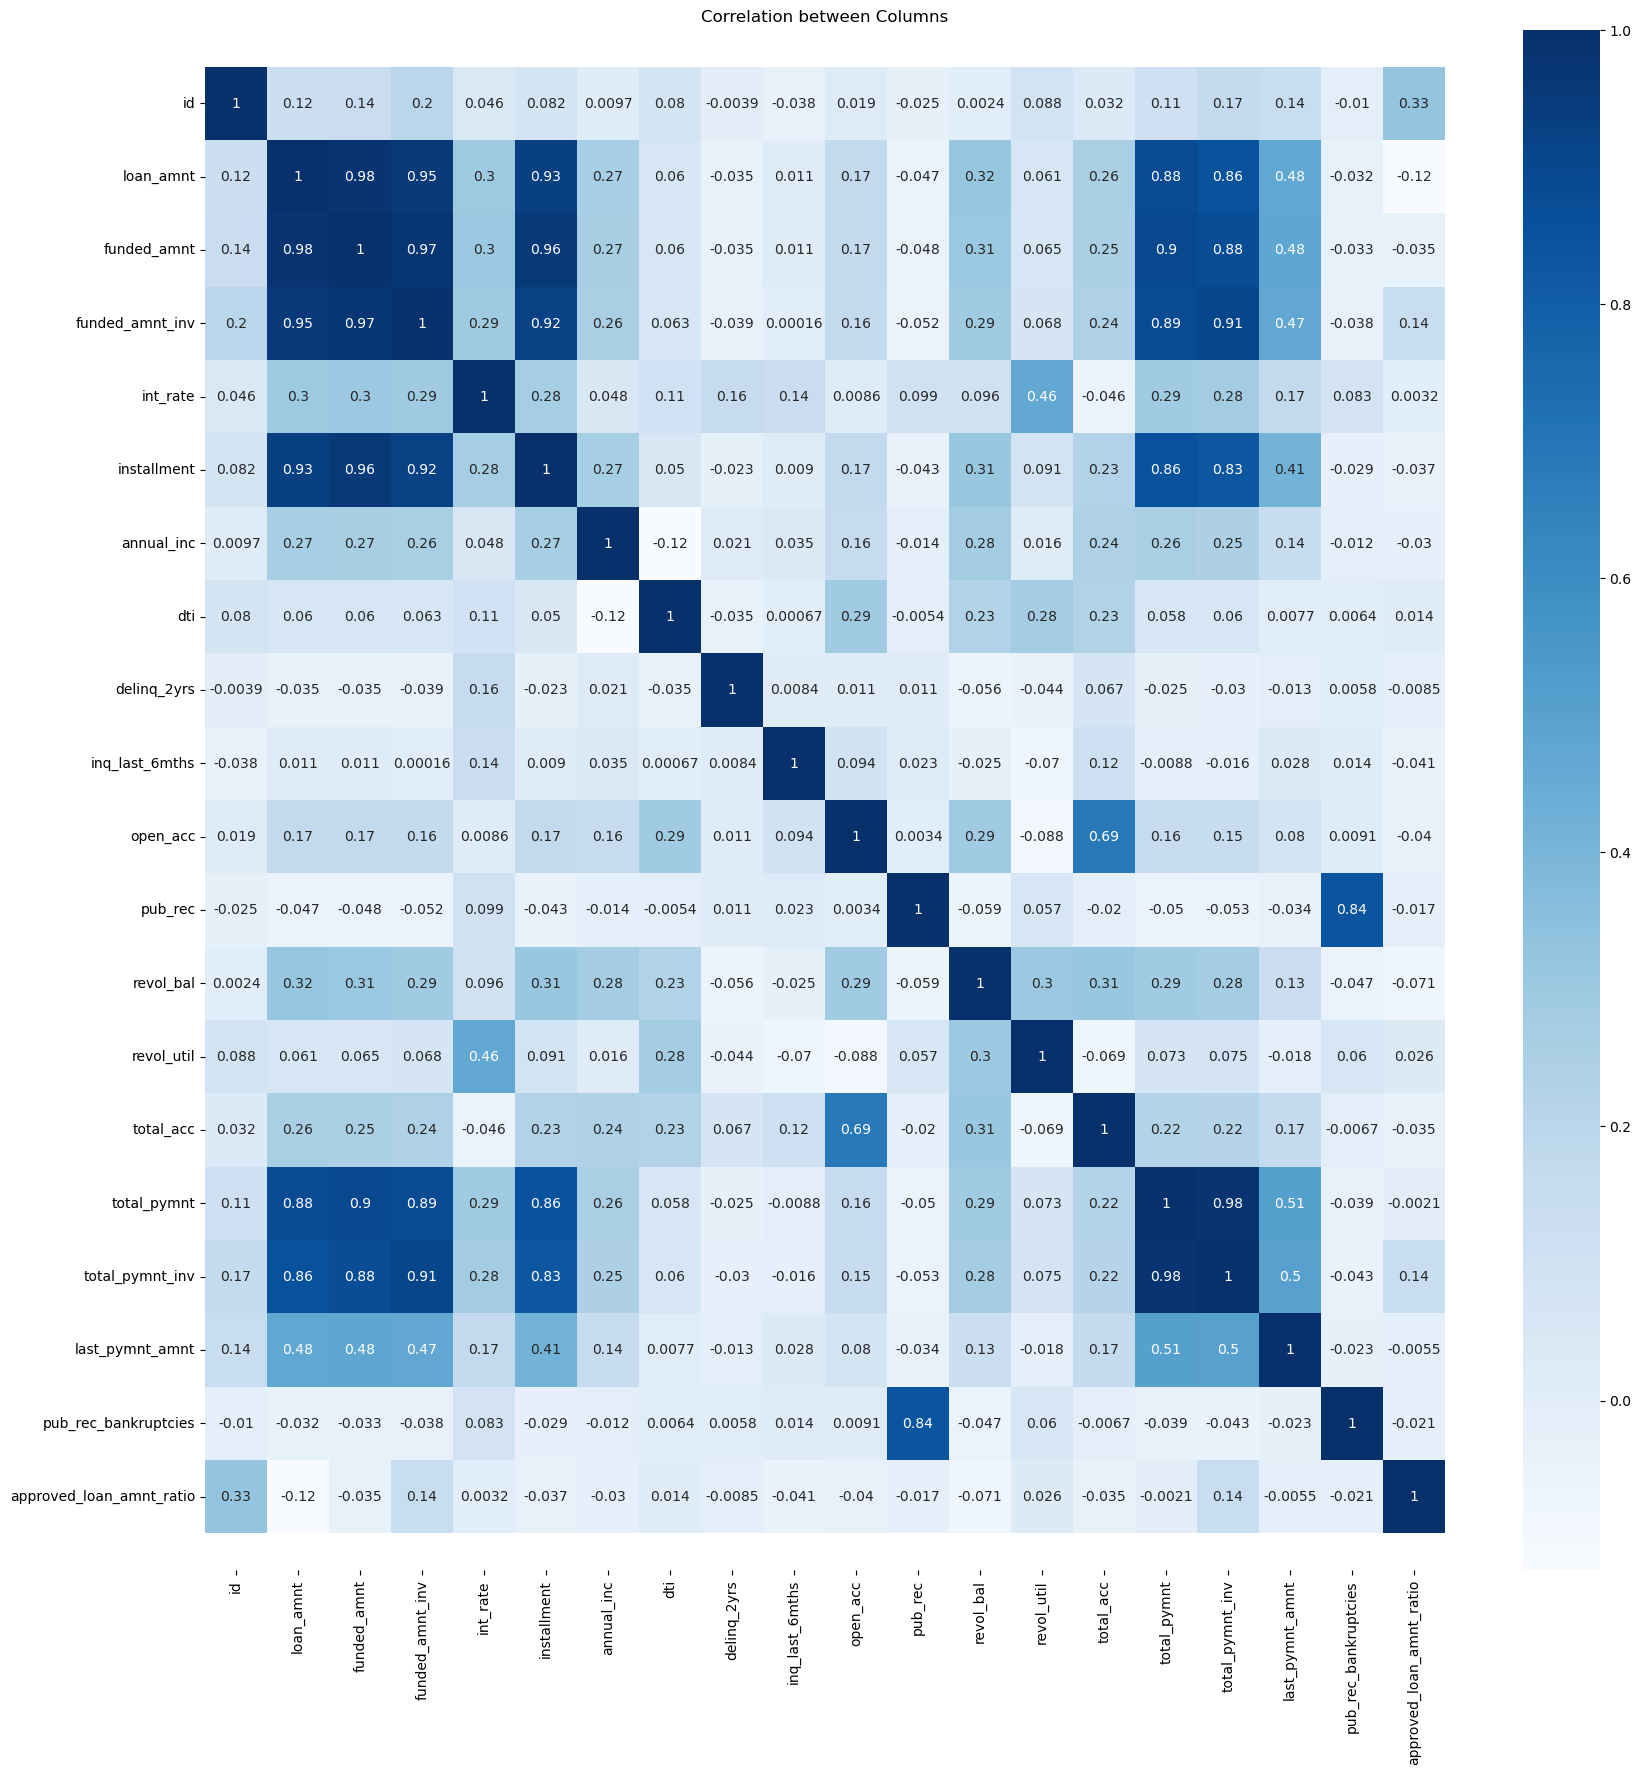

In [117]:
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

#### Observations: Public derogatory records columns is positively correlated to public bankruptcies records. 

# THE END

AttributeError: module 'pandas' has no attribute 'version'